# Price Prediction Of used Cars <br>

# Company Introduction

- SWIPECAR, is an American company that buys and sells second hand cars.
- They initiated their business in the late 80s and have gained huge popularity over the years.
- The company clients are local and foreign customers who seek to buy and sell second hand cars.

# Scenario
- Company has started facing loss in business due to the technical advancements.
- There are several competitors in the market who have been using enhanced techniques.
- The company is pretty old and they have been using traditional measures to estimate old cars prices.
- These traditional measures include weight analysis, condition of parts and build year
- They are looking for a more robust way to estimate the price of old cars.

- They have been using manual traditional measures to estimate old cars prices.
- These measures are time consuming and not accurate.
- Company is looking for a robust way to estimate the prices of used cars.

- You will be given a set of data to predict the prices of used cars based on their features.
- You need to find an automated way to get rid of their manual work.
- Your task is to build a regression model using the provided data.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [2]:
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None) 

In [3]:
from sklearn.model_selection import train_test_split                              # To split the data in training and testing part 
from sklearn.preprocessing import StandardScaler                                  # Importing Standard Scaler library from preprocessing.                             
from sklearn.linear_model import LinearRegression                                 # Importing Linear Regression model
from sklearn.metrics import mean_squared_error                                    # To calculate the MSE of a regression model
from sklearn.metrics import mean_absolute_error                                   # To calculate the MAE of a regression model
from sklearn.metrics import r2_score                                              # To calculate the R-squared score of a regression model
from sklearn import metrics

In [4]:
df = pd.read_csv('TrainData.csv',index_col=None)

In [5]:
df.head()

ID  symboling normalized-losses     make fuel-type aspiration num-of-doors  \
0   1         -1                65   toyota       gas        std         four   
1   2          0               188      bmw       gas        std          two   
2   3          0                 ?  renault       gas        std         four   
3   4          0               161   peugot    diesel      turbo         four   
4   5         -2               103    volvo       gas        std         four   

  body-style drive-wheels engine-location  wheel-base  length  width  height  \
0  hatchback          fwd           front       102.4   175.6   66.5    53.9   
1      sedan          rwd           front       101.2   176.8   64.8    54.3   
2      wagon          fwd           front        96.1   181.5   66.5    55.2   
3      sedan          rwd           front       107.9   186.7   68.4    56.7   
4      sedan          rwd           front       104.3   188.8   67.2    56.2   

   curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
0         2458         ohc             four          122        mpfi  3.31   
1         2710         ohc              six          164        mpfi  3.31   
2         2579         ohc             four          132        mpfi  3.46   
3         3197           l             four          152         idi   3.7   
4         2935         ohc             four          141        mpfi  3.78   

  stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  price  
0   3.54                8.7         92     4200        27           32  11248  
1   3.19                9.0        121     4250        21           28  20970  
2    3.9                8.7          ?        ?        23           31   9295  
3   3.52               21.0         95     4150        28           33  13200  
4   3.15                9.5        114     5400        24           28  15985

# Data description and  Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 181 non-null    int64  
 1   symboling          181 non-null    int64  
 2   normalized-losses  181 non-null    object 
 3   make               181 non-null    object 
 4   fuel-type          181 non-null    object 
 5   aspiration         181 non-null    object 
 6   num-of-doors       181 non-null    object 
 7   body-style         181 non-null    object 
 8   drive-wheels       181 non-null    object 
 9   engine-location    181 non-null    object 
 10  wheel-base         181 non-null    float64
 11  length             181 non-null    float64
 12  width              181 non-null    float64
 13  height             181 non-null    float64
 14  curb-weight        181 non-null    int64  
 15  engine-type        181 non-null    object 
 16  num-of-cylinders   181 non

**`?`**  indicating missing values<br>
We'll replace them with NaN for better understanding

In [7]:
for i in df.columns[1:].tolist():
    print(i,df.loc[df[i]=='?'][i].count())

symboling 0
normalized-losses 34
make 0
fuel-type 0
aspiration 0
num-of-doors 2
body-style 0
drive-wheels 0
engine-location 0
wheel-base 0
length 0
width 0
height 0
curb-weight 0
engine-type 0
num-of-cylinders 0
engine-size 0
fuel-system 0
bore 4
stroke 4
compression-ratio 0
horsepower 2
peak-rpm 2
city-mpg 0
highway-mpg 0
price 0


In [8]:
for i in df.columns[1:].tolist():
    for j in df[df[i]=='?'][i].index.tolist():
        df[i].iloc[j]=np.nan

In [9]:
df.info(verbose=True,memory_usage='deep',null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 181 non-null    int64  
 1   symboling          181 non-null    int64  
 2   normalized-losses  147 non-null    object 
 3   make               181 non-null    object 
 4   fuel-type          181 non-null    object 
 5   aspiration         181 non-null    object 
 6   num-of-doors       179 non-null    object 
 7   body-style         181 non-null    object 
 8   drive-wheels       181 non-null    object 
 9   engine-location    181 non-null    object 
 10  wheel-base         181 non-null    float64
 11  length             181 non-null    float64
 12  width              181 non-null    float64
 13  height             181 non-null    float64
 14  curb-weight        181 non-null    int64  
 15  engine-type        181 non-null    object 
 16  num-of-cylinders   181 non

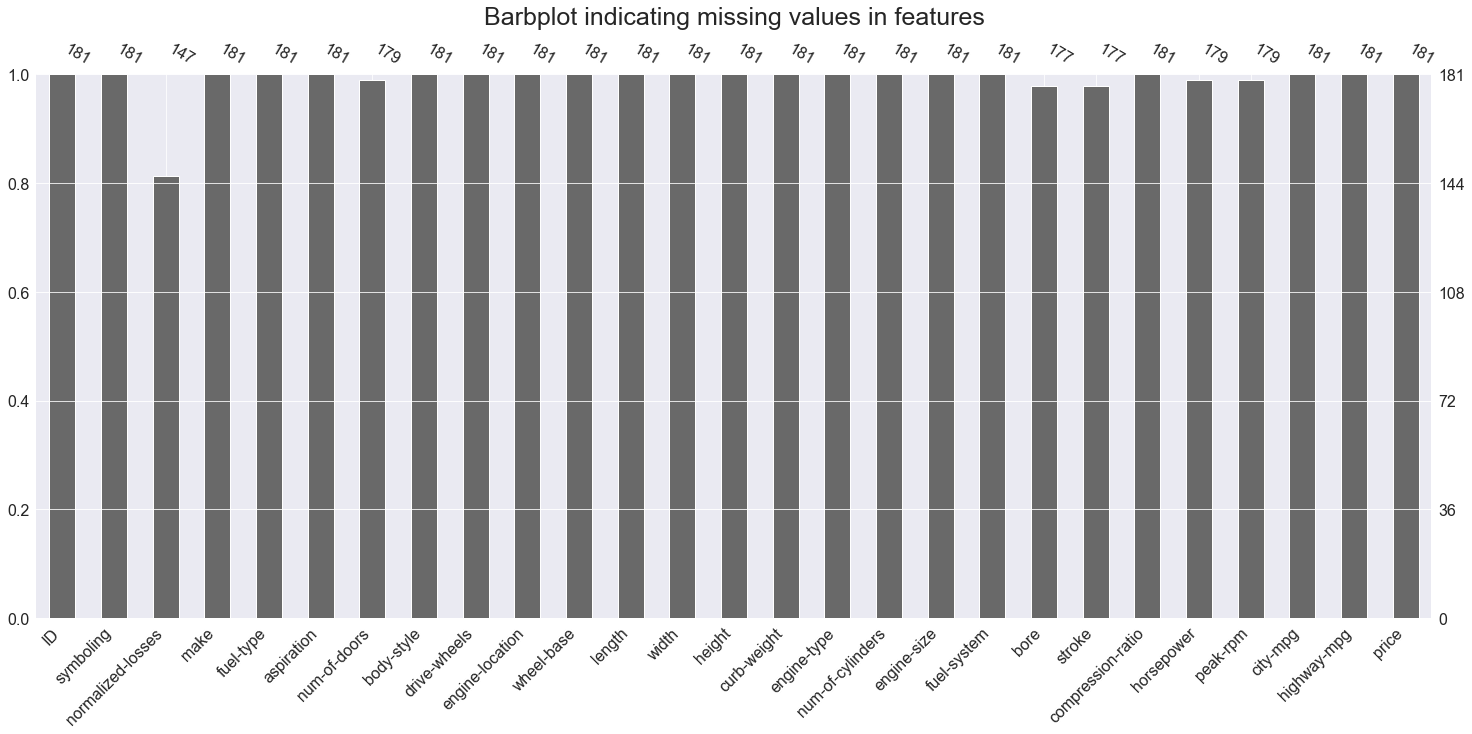

Missing Values in Features

normalized-losses 18.8%
num-of-doors 1.1%
bore 2.2%
stroke 2.2%
horsepower 1.1%
peak-rpm 1.1%


<Figure size 432x288 with 0 Axes>

In [10]:
cols = []
msno.bar(df)
plt.title('Barbplot indicating missing values in features',fontdict={'fontsize':25},pad=50.0)
plt.xticks(rotation=-30)
plt.show()
print('Missing Values in Features',end='\n\n')
for i,j in enumerate(df.isnull().sum()):
    if '%.1f'%((j/df.shape[0])*100) !='0.0':
        print(df.columns[i],'%.1f'%((j/df.shape[0])*100)+'%')
        cols.append(df.columns[i])
plt.savefig('missing_files.png',dpi=300,bbox_inches='tight')

In [11]:
def unique_values(data):
    '''This function will print the nunique values for all columns present in the dataset
    eg. dataset_name is the target dataset. Pass the data to the function
    
    unique_values(dataset_name)
    
    It will print the result
    '''
    for column in data.columns:
        print('Unique Values in feature',column)
        print(data[column].nunique())
        if data[column].nunique()<30:
            print('\nValues are -> ',data[column].unique())
        print('-'*50)

In [12]:
unique_values(df)

Unique Values in feature ID
181
--------------------------------------------------
Unique Values in feature symboling
6

Values are ->  [-1  0 -2  1  3  2]
--------------------------------------------------
Unique Values in feature normalized-losses
51
--------------------------------------------------
Unique Values in feature make
22

Values are ->  ['toyota' 'bmw' 'renault' 'peugot' 'volvo' 'dodge' 'jaguar' 'porsche'
 'subaru' 'mitsubishi' 'volkswagen' 'honda' 'mazda' 'mercedes-benz' 'saab'
 'nissan' 'mercury' 'plymouth' 'audi' 'chevrolet' 'isuzu' 'alfa-romero']
--------------------------------------------------
Unique Values in feature fuel-type
2

Values are ->  ['gas' 'diesel']
--------------------------------------------------
Unique Values in feature aspiration
2

Values are ->  ['std' 'turbo']
--------------------------------------------------
Unique Values in feature num-of-doors
2

Values are ->  ['four' 'two' nan]
--------------------------------------------------
Unique Val

In [13]:
df.describe()

ID   symboling  wheel-base      length       width      height  \
count  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000   
mean    91.000000    0.850829   98.729282  174.174033   65.943646   53.709945   
std     52.394338    1.267045    6.116197   12.336569    2.146114    2.497735   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     46.000000    0.000000   94.500000  166.800000   64.200000   51.600000   
50%     91.000000    1.000000   96.900000  173.200000   65.500000   54.100000   
75%    136.000000    2.000000  102.400000  183.100000   66.600000   55.500000   
max    181.000000    3.000000  120.900000  208.100000   72.000000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  \
count   181.000000   181.000000         181.000000  181.000000   181.000000   
mean   2564.165746   127.900552          10.154254   25.132597    30.646409   
std     523.489016    42.578438           3.982306    6.418211     6.888545   
min    1488.000000    61.000000           7.000000   13.000000    16.000000   
25%    2190.000000    98.000000           8.600000   19.000000    25.000000   
50%    2420.000000   120.000000           9.000000   24.000000    30.000000   
75%    2935.000000   146.000000           9.400000   30.000000    34.000000   
max    4066.000000   326.000000          23.000000   49.000000    54.000000   

              price  
count    181.000000  
mean   13271.314917  
std     8106.479635  
min     5118.000000  
25%     7775.000000  
50%    10295.000000  
75%    16500.000000  
max    45400.000000

<span style="font-family: TimesNewRoman; font-size:1.4em;color:blue;">Observations</span>
- Total entries : 181
- Total features : 26
- **`normalized-losses`** has 147 values 18.8% values are missing
- **`num-of-doors`** **`horsepower`** **`peak-rpm`** has 2 values (1.1%) missing 
- **`bore`** **`stroke`** has 4 values (2.2%) missing 
- In dataset, **5 features** are of **float** type, **7 features** are of **integer** type, and **15 features** are of **object** type
- **`Normalized-losses`** **`bore`** **`stroke`** **`horsepower`** **`peak rpm`** we know these features are quantitative variables but are of object dtype and required to be converted into numerical dtype
- **`Number of cylinders`** **`number of doors`** need to be converted to integer
- ID can be dropped

# Data processing

In [14]:
df.drop(labels=['ID','normalized-losses'],axis=1,inplace=True)

## change identified dtypes

### First lets check if missing value in one feature also missing in another feature at the same location

In [15]:
df[df['horsepower'].isna()==True]

symboling     make fuel-type aspiration num-of-doors body-style  \
2            0  renault       gas        std         four      wagon   
137          2  renault       gas        std          two  hatchback   

    drive-wheels engine-location  wheel-base  length  width  height  \
2            fwd           front        96.1   181.5   66.5    55.2   
137          fwd           front        96.1   176.8   66.6    50.5   

     curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
2           2579         ohc             four          132        mpfi  3.46   
137         2460         ohc             four          132        mpfi  3.46   

    stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
2      3.9                8.7        NaN      NaN        23           31   
137    3.9                8.7        NaN      NaN        23           31   

     price  
2     9295  
137   9895

In [16]:
df[df['num-of-doors'].isna()==True]

symboling   make fuel-type aspiration num-of-doors body-style  \
93           1  dodge       gas      turbo          NaN      sedan   
166          0  mazda    diesel        std          NaN      sedan   

    drive-wheels engine-location  wheel-base  length  width  height  \
93           fwd           front        93.7   157.3   63.8    50.6   
166          fwd           front        98.8   177.8   66.5    55.5   

     curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
93          2191         ohc             four           98        mpfi  3.03   
166         2443         ohc             four          122         idi  3.39   

    stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
93    3.39                7.6        102     5500        24           30   
166   3.39               22.7         64     4650        36           42   

     price  
93    8558  
166  10795

In [17]:
df[df['bore'].isna()==True]

symboling   make fuel-type aspiration num-of-doors body-style  \
23           3  mazda       gas        std          two  hatchback   
53           3  mazda       gas        std          two  hatchback   
54           3  mazda       gas        std          two  hatchback   
111          3  mazda       gas        std          two  hatchback   

    drive-wheels engine-location  wheel-base  length  width  height  \
23           rwd           front        95.3   169.0   65.7    49.6   
53           rwd           front        95.3   169.0   65.7    49.6   
54           rwd           front        95.3   169.0   65.7    49.6   
111          rwd           front        95.3   169.0   65.7    49.6   

     curb-weight engine-type num-of-cylinders  engine-size fuel-system bore  \
23          2500       rotor              two           80        mpfi  NaN   
53          2380       rotor              two           70        4bbl  NaN   
54          2380       rotor              two           70        4bbl  NaN   
111         2385       rotor              two           70        4bbl  NaN   

    stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
23     NaN                9.4        135     6000        16           23   
53     NaN                9.4        101     6000        17           23   
54     NaN                9.4        101     6000        17           23   
111    NaN                9.4        101     6000        17           23   

     price  
23   15645  
53   10945  
54   11845  
111  13645

<span style="font-family: TimesNewRoman; font-size:1.4em;color:blue;">Observation</span>
- bore and stroke has missing value at the same id
- Here, we oserved that id 53 and 54 have same entries except price. (We can check in details for duplicate entries)

**Let's drop missing values (8 entries)**

In [18]:
df.dropna(subset=cols[1:],inplace=True)

In [19]:
df.shape

(173, 25)

In [20]:
'''a = {'four':4,'six':6,'five':5,'eight':8,'three':3,'twelve':12,'two':2}
df['num-of-cylinders'].replace(a,inplace=True)
df['num-of-doors'].replace(a,inplace=True)'''

"a = {'four':4,'six':6,'five':5,'eight':8,'three':3,'twelve':12,'two':2}\ndf['num-of-cylinders'].replace(a,inplace=True)\ndf['num-of-doors'].replace(a,inplace=True)"

In [21]:
df.reset_index(drop=True,inplace=True)

In [22]:
df.head()

symboling    make fuel-type aspiration num-of-doors body-style  \
0         -1  toyota       gas        std         four  hatchback   
1          0     bmw       gas        std          two      sedan   
2          0  peugot    diesel      turbo         four      sedan   
3         -2   volvo       gas        std         four      sedan   
4          1   dodge       gas      turbo          two  hatchback   

  drive-wheels engine-location  wheel-base  length  width  height  \
0          fwd           front       102.4   175.6   66.5    53.9   
1          rwd           front       101.2   176.8   64.8    54.3   
2          rwd           front       107.9   186.7   68.4    56.7   
3          rwd           front       104.3   188.8   67.2    56.2   
4          fwd           front        93.7   157.3   63.8    50.8   

   curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
0         2458         ohc             four          122        mpfi  3.31   
1         2710         ohc              six          164        mpfi  3.31   
2         3197           l             four          152         idi   3.7   
3         2935         ohc             four          141        mpfi  3.78   
4         2128         ohc             four           98        mpfi  3.03   

  stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  price  
0   3.54                8.7         92     4200        27           32  11248  
1   3.19                9.0        121     4250        21           28  20970  
2   3.52               21.0         95     4150        28           33  13200  
3   3.15                9.5        114     5400        24           28  15985  
4   3.39                7.6        102     5500        24           30   7957

### change dtype of identified features

In [23]:
df['horsepower'] = df.horsepower.astype('int64')
df['peak-rpm'] = df['peak-rpm'].astype('int64')
df['bore'] = df.bore.astype('float')
df['stroke'] = df.stroke.astype('float')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          173 non-null    int64  
 1   make               173 non-null    object 
 2   fuel-type          173 non-null    object 
 3   aspiration         173 non-null    object 
 4   num-of-doors       173 non-null    object 
 5   body-style         173 non-null    object 
 6   drive-wheels       173 non-null    object 
 7   engine-location    173 non-null    object 
 8   wheel-base         173 non-null    float64
 9   length             173 non-null    float64
 10  width              173 non-null    float64
 11  height             173 non-null    float64
 12  curb-weight        173 non-null    int64  
 13  engine-type        173 non-null    object 
 14  num-of-cylinders   173 non-null    object 
 15  engine-size        173 non-null    int64  
 16  fuel-system        173 non

In [25]:
object_cols = []
num_cols = []
for i in df.columns.tolist():
    if df[i].dtype=='O':
        object_cols.append(i)
    elif df[i].dtype=='int64' or df[i].dtype=='float64':
        num_cols.append(i)
print('Object columns :',object_cols,len(object_cols),end='\n\n')
print('Numerical columns :',num_cols,len(num_cols),end='\n\n')
print('Total columns :',len(object_cols)+len(num_cols))

Object columns : ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'] 10

Numerical columns : ['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'] 15

Total columns : 25


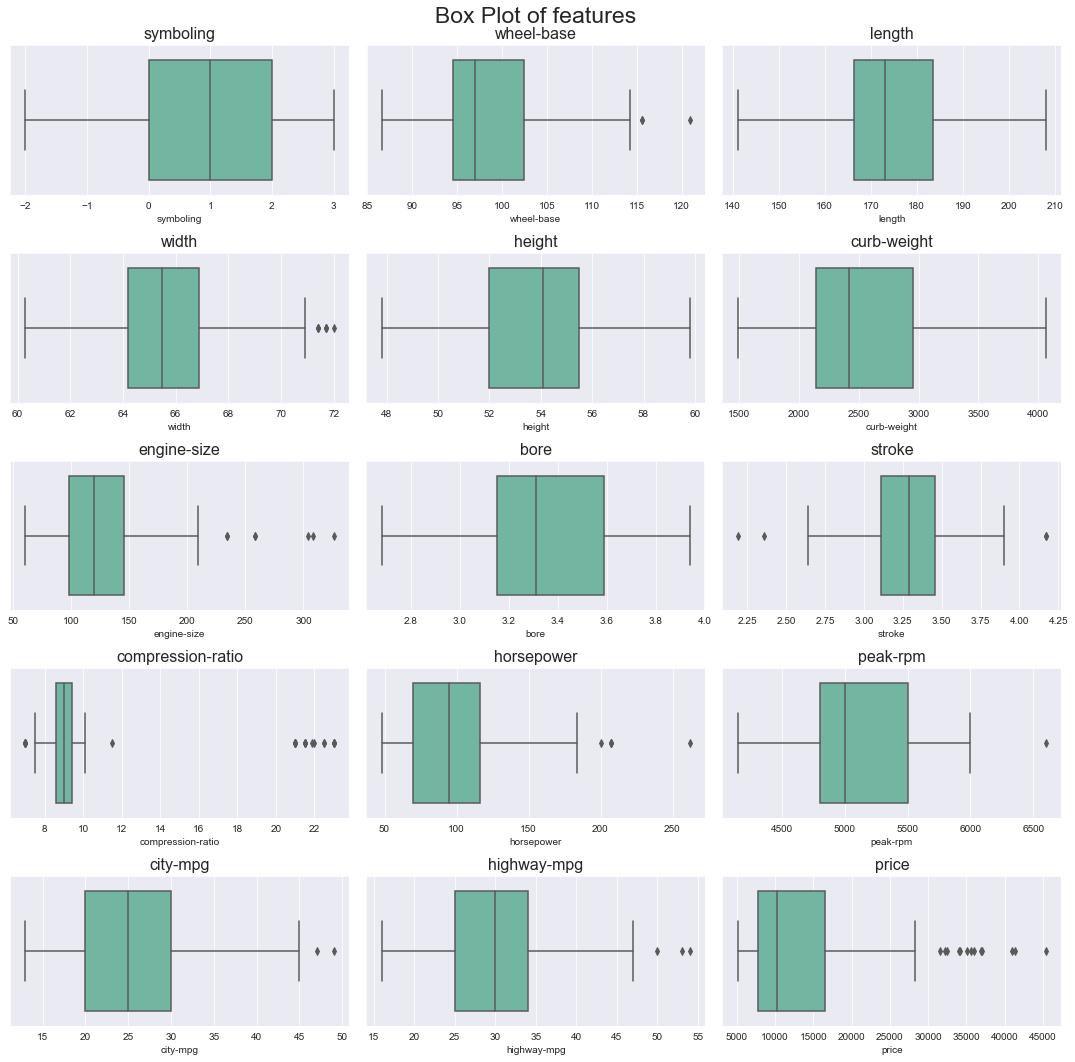

In [26]:
fig,ax = plt.subplots(5,3,figsize=(15,15))
b = 0
for i in range(0,5):
    for j in range(0,3):
        a = sns.boxplot(df[num_cols[b]],ax = ax[i,j])
        a.set_title(num_cols[b],fontdict={'fontsize':16})
        b = b+1
        fig.suptitle('Box Plot of features',size = 23)
fig.tight_layout()
plt.savefig('Boxplot of Features.png')

We can observe outliers in **`wheel-base`** **`width`** **`engine-size`** **`stroke`** **`compression-ratio`** **`horsepower`** **`peak-rpm`** **`city-mpg`** **`highway-mpg`**

In [27]:
def get_range(cols):
    for i in cols:
        print(i,max(df[i]-min(df[i])))

In [28]:
get_range(['wheel-base', 'width', 'engine-size', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'])

wheel-base 34.30000000000001
width 11.700000000000003
engine-size 265
stroke 1.98
compression-ratio 16.0
horsepower 214
peak-rpm 2450
city-mpg 36
highway-mpg 38


For the columns in which we found outliers, the range is very small except peak-rpm<br>
Hence we'll **remove outlier from peak-rpm**

In [29]:
z_scores = zscore(df[['peak-rpm']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]
new_df.shape

(172, 25)

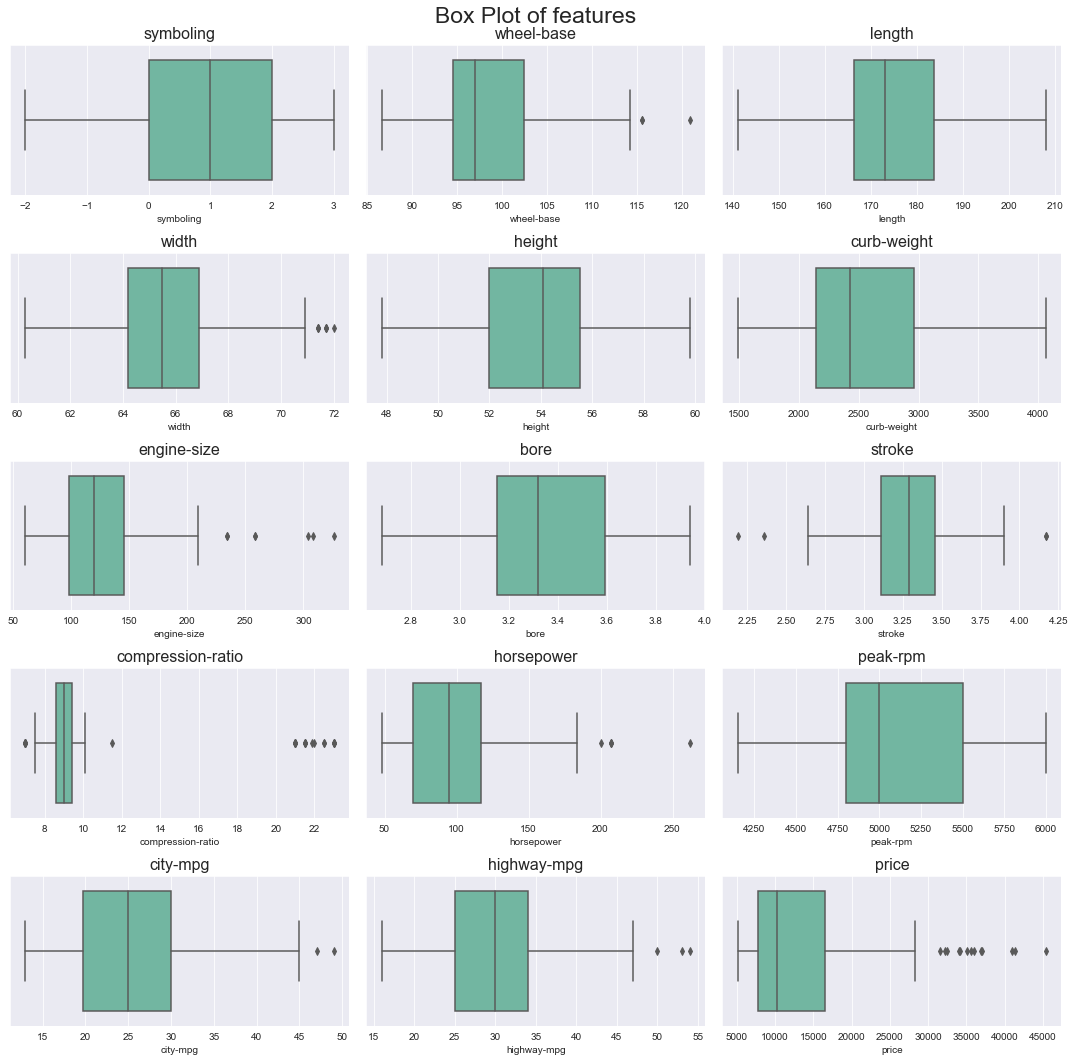

In [30]:
fig,ax = plt.subplots(5,3,figsize=(15,15))
b = 0
for i in range(0,5):
    for j in range(0,3):
        a = sns.boxplot(new_df[num_cols[b]],ax = ax[i,j])
        a.set_title(num_cols[b],fontdict={'fontsize':16})
        b = b+1
        fig.suptitle('Box Plot of features',size = 23)
fig.tight_layout()
plt.show()

In [31]:
'''
fig,axes = plt.subplots(1,2,figsize=(13,5),sharey=True)
sns.barplot(x='compression-ratio',y='price',data=df[df['compression-ratio']>20],ax=axes[0])
axes[0].set_title('Compression-ratio greater than 20')
sns.barplot(x='compression-ratio',y='price',data=df[df['compression-ratio']<20],ax=axes[1])
axes[1].set_title('Compression-ratio less than 20')
plt.show()
'''

"\nfig,axes = plt.subplots(1,2,figsize=(13,5),sharey=True)\nsns.barplot(x='compression-ratio',y='price',data=df[df['compression-ratio']>20],ax=axes[0])\naxes[0].set_title('Compression-ratio greater than 20')\nsns.barplot(x='compression-ratio',y='price',data=df[df['compression-ratio']<20],ax=axes[1])\naxes[1].set_title('Compression-ratio less than 20')\nplt.show()\n"

# Data Post Profiling

<span style="font-family: TimesNewRoman; font-size:1.4em;color:blue;">Observations</span><br><br>
- total rows : 172
- total features : 25
- 7 features with float dtype
- 8 features with int dtype
- 10 features with object dtype
- no missing value

# EDA

## Name of Car companies and vehicle entries in dataset

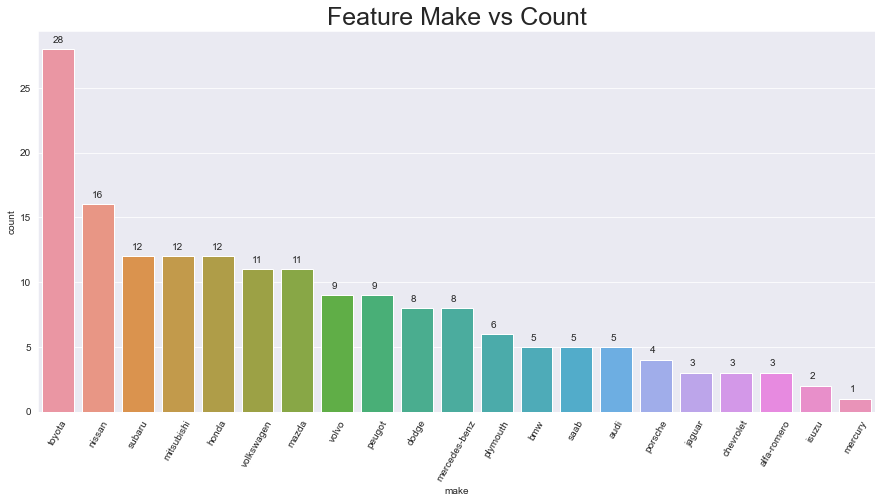

In [32]:
plt.figure(figsize=(15,7))
a = sns.countplot(x = 'make',data=df,order=df['make'].value_counts().index)
plt.title('Feature Make vs Count',fontdict={'fontsize':25})
plt.xticks(rotation=60)

for p in a.patches:
    a.annotate('{}'.format(p.get_height()), (p.get_x()+.25, p.get_height()+0.5))

plt.savefig('make vs count.png',dip=300,bbox_inches='tight')
plt.show()


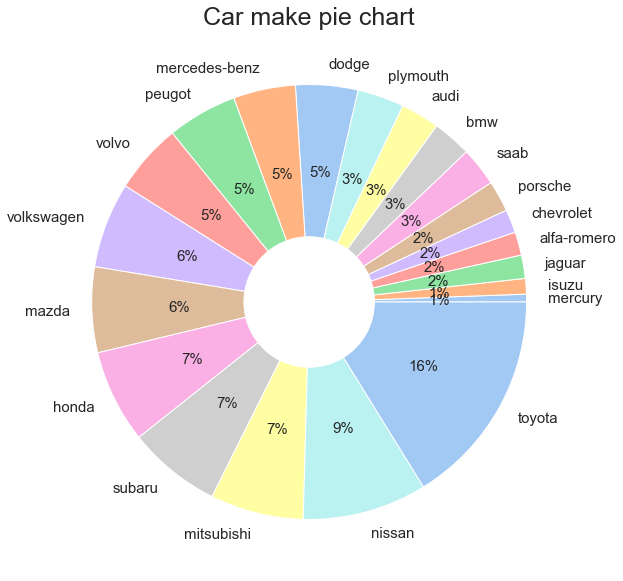

In [33]:
a = list(df.groupby('make').size().sort_values().index)
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 15})
plt.pie(df.groupby('make').size().sort_values(),labels=a,colors= sns.color_palette('pastel')[0:len(a)],autopct='%.0f%%',wedgeprops=dict(width=0.7))
plt.title('Car make pie chart',fontdict={'fontsize':25})
plt.savefig('piechart_make.png',dpi=300,bbox_inches='tight')
plt.show()

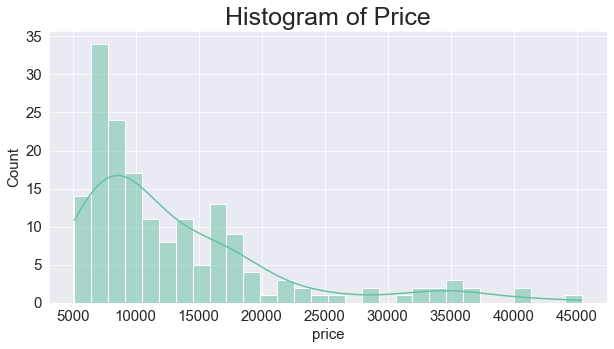

In [44]:
plt.figure(figsize=(10,5))
plt.title('Histogram of Price',fontdict={'fontsize':25})
sns.histplot(data = df,x='price',bins=30,kde=True)
plt.savefig('Price hist.png',dpi=300,bbox_inches='tight')
plt.show()


Totota cars are more in dataset followed by nissan <br>
Subaru, Mitsubishi, Honda, volkswagen, mazda cars are also present in more numbers

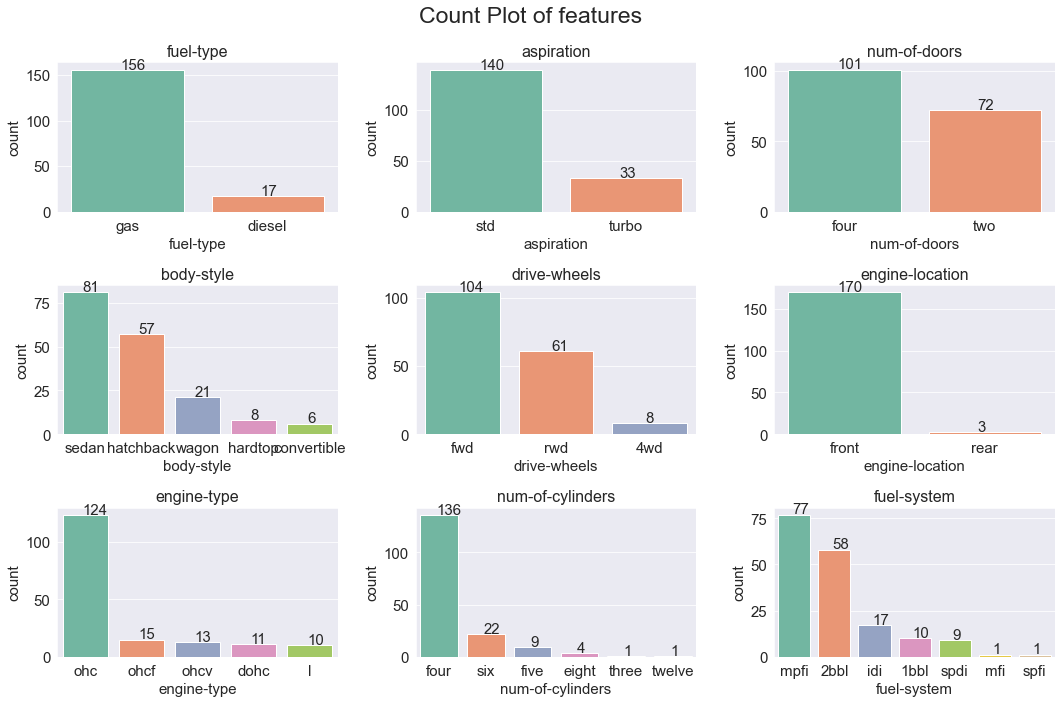

In [35]:
fig,ax = plt.subplots(3,3,figsize=(15,10))
b = 1
for i in range(0,3):
    for j in range(0,3):
        a = sns.countplot(df[object_cols[b]],ax = ax[i,j],order=df[object_cols[b]].value_counts().index)
        a.set_title(object_cols[b],fontdict={'fontsize':16})
        
        for p in a.patches:
            a.annotate('{}'.format(p.get_height()), (p.get_x()+.35, p.get_height()+0.8))
        fig.suptitle('Count Plot of features',size = 23)
        b = b+1
        
fig.tight_layout()
plt.savefig('coutplot.png',dip=300,bbox_inches='tight',pad_inches=0.1)

<span style="font-family: TimesNewRoman; font-size:1.4em;color:blue;">Observations</span><br><br>

- Highest number of entries are of Toyota 28 entries followed by Nissan-16 entries, Subaru-12 entries, Mitsubishi-12 entries and Honda-12 entries
- Maximum car fuel type is gas type
- std Aspiration has maximum entries
- Vehicles with 4 doors has 101 entries and 2 doors has 72 entris
- Sedan car body stye has maximum entries 81 followed by hachback 51 entries Wagon, Hardtop and Convertible
- Vehicles with front wheel drive has mxaimum entries 104 followed rear wheel drive 61 entries. 4 wheel drive vehicles are very less
- Maximum vehicles are of ohc engine type with 4 cylinders 
- Multipoint fuel injection mpfi and 2 barrel fuel injection these are the two high counted fuel systems

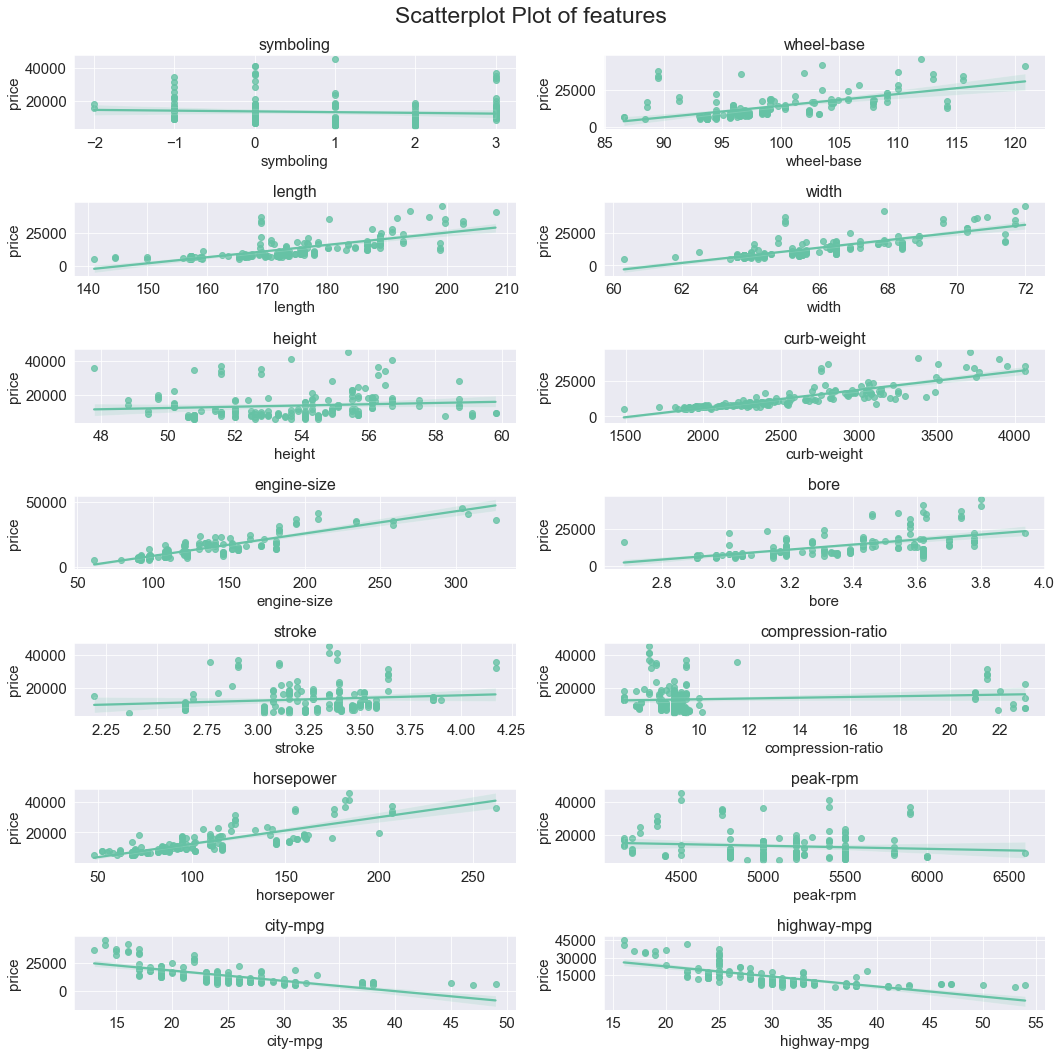

In [36]:
fig,ax = plt.subplots(7,2,figsize=(15,15))
b = 0
for i in range(0,7):
    for j in range(0,2):
        #a = sns.scatterplot(x=df[num_cols[b]],y=df['price'],ax = ax[i,j],)
        a = sns.regplot(x=num_cols[b],y='price',data=df,ax = ax[i,j])
        a.set_title(num_cols[b],fontdict={'fontsize':16})
        plt.yticks(ticks=[15000,30000,45000])
        b = b+1
        fig.suptitle('Scatterplot Plot of features',size = 23)
fig.tight_layout()
plt.savefig('Scatterplot of Features.png')

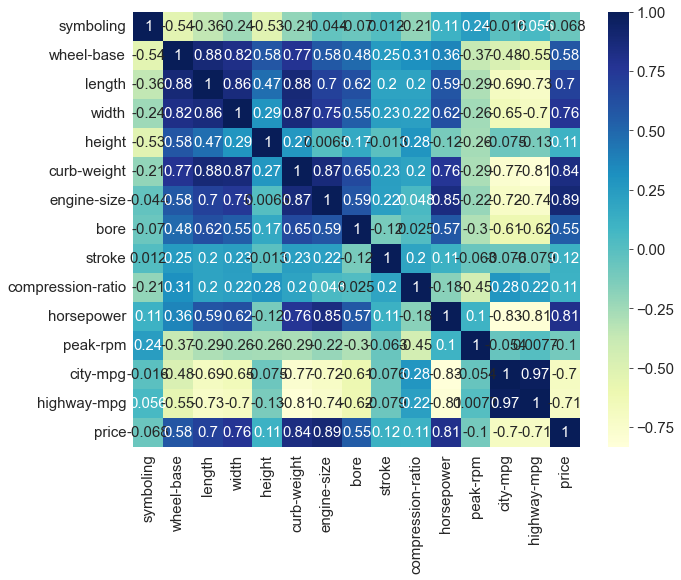

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True ,cmap="YlGnBu" )
plt.savefig('heatmap.png',dpi=300, bbox_inches='tight',pad_inches=0.5)
plt.show()

<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>
 
-  **`wheel base`**, **`length`**, **`width`** and **`curb weight`** show strong positive correlation with each other which is reasonable as lenght of the vehicle is more it also required good width and that requires high wheel base as well
- **`Height`** show positive correlation with **`wheel base`**
- **`engine size`** shows positive strong correlattion with **`Horsepower`**,**`curb-weight`**,**`lenght`** and **`width`** which is true because for high horsepower, big engine is required
- **`bore`** show positive correlation with **`horsepower`** **`engine-size`** **`curb weight`** **`width`** and **`length`**
- **`horsepower`** show strong positive correlation with **`engine size`** **`curb weight`** **`width`** **`length`** and **`bore`**
- **`city-mpg`** and **`highway-mpg`** show strong **negative** correlation with **`length`**, **`width`**,**`engine-size`** **`curb weight`** **`bore`** and **`horsepower`** but show positive correlation with each other which is reasonable because vehicles having high power consume more fuel and reduces the mileage 
- **`price`** shows strong positive correlation with **`length`**, **`width`**,**`engine-size`** **`curb weight`** **`horsepower`** and strong negative correlation with **`city-mpg`** and **`highway-mpg`**

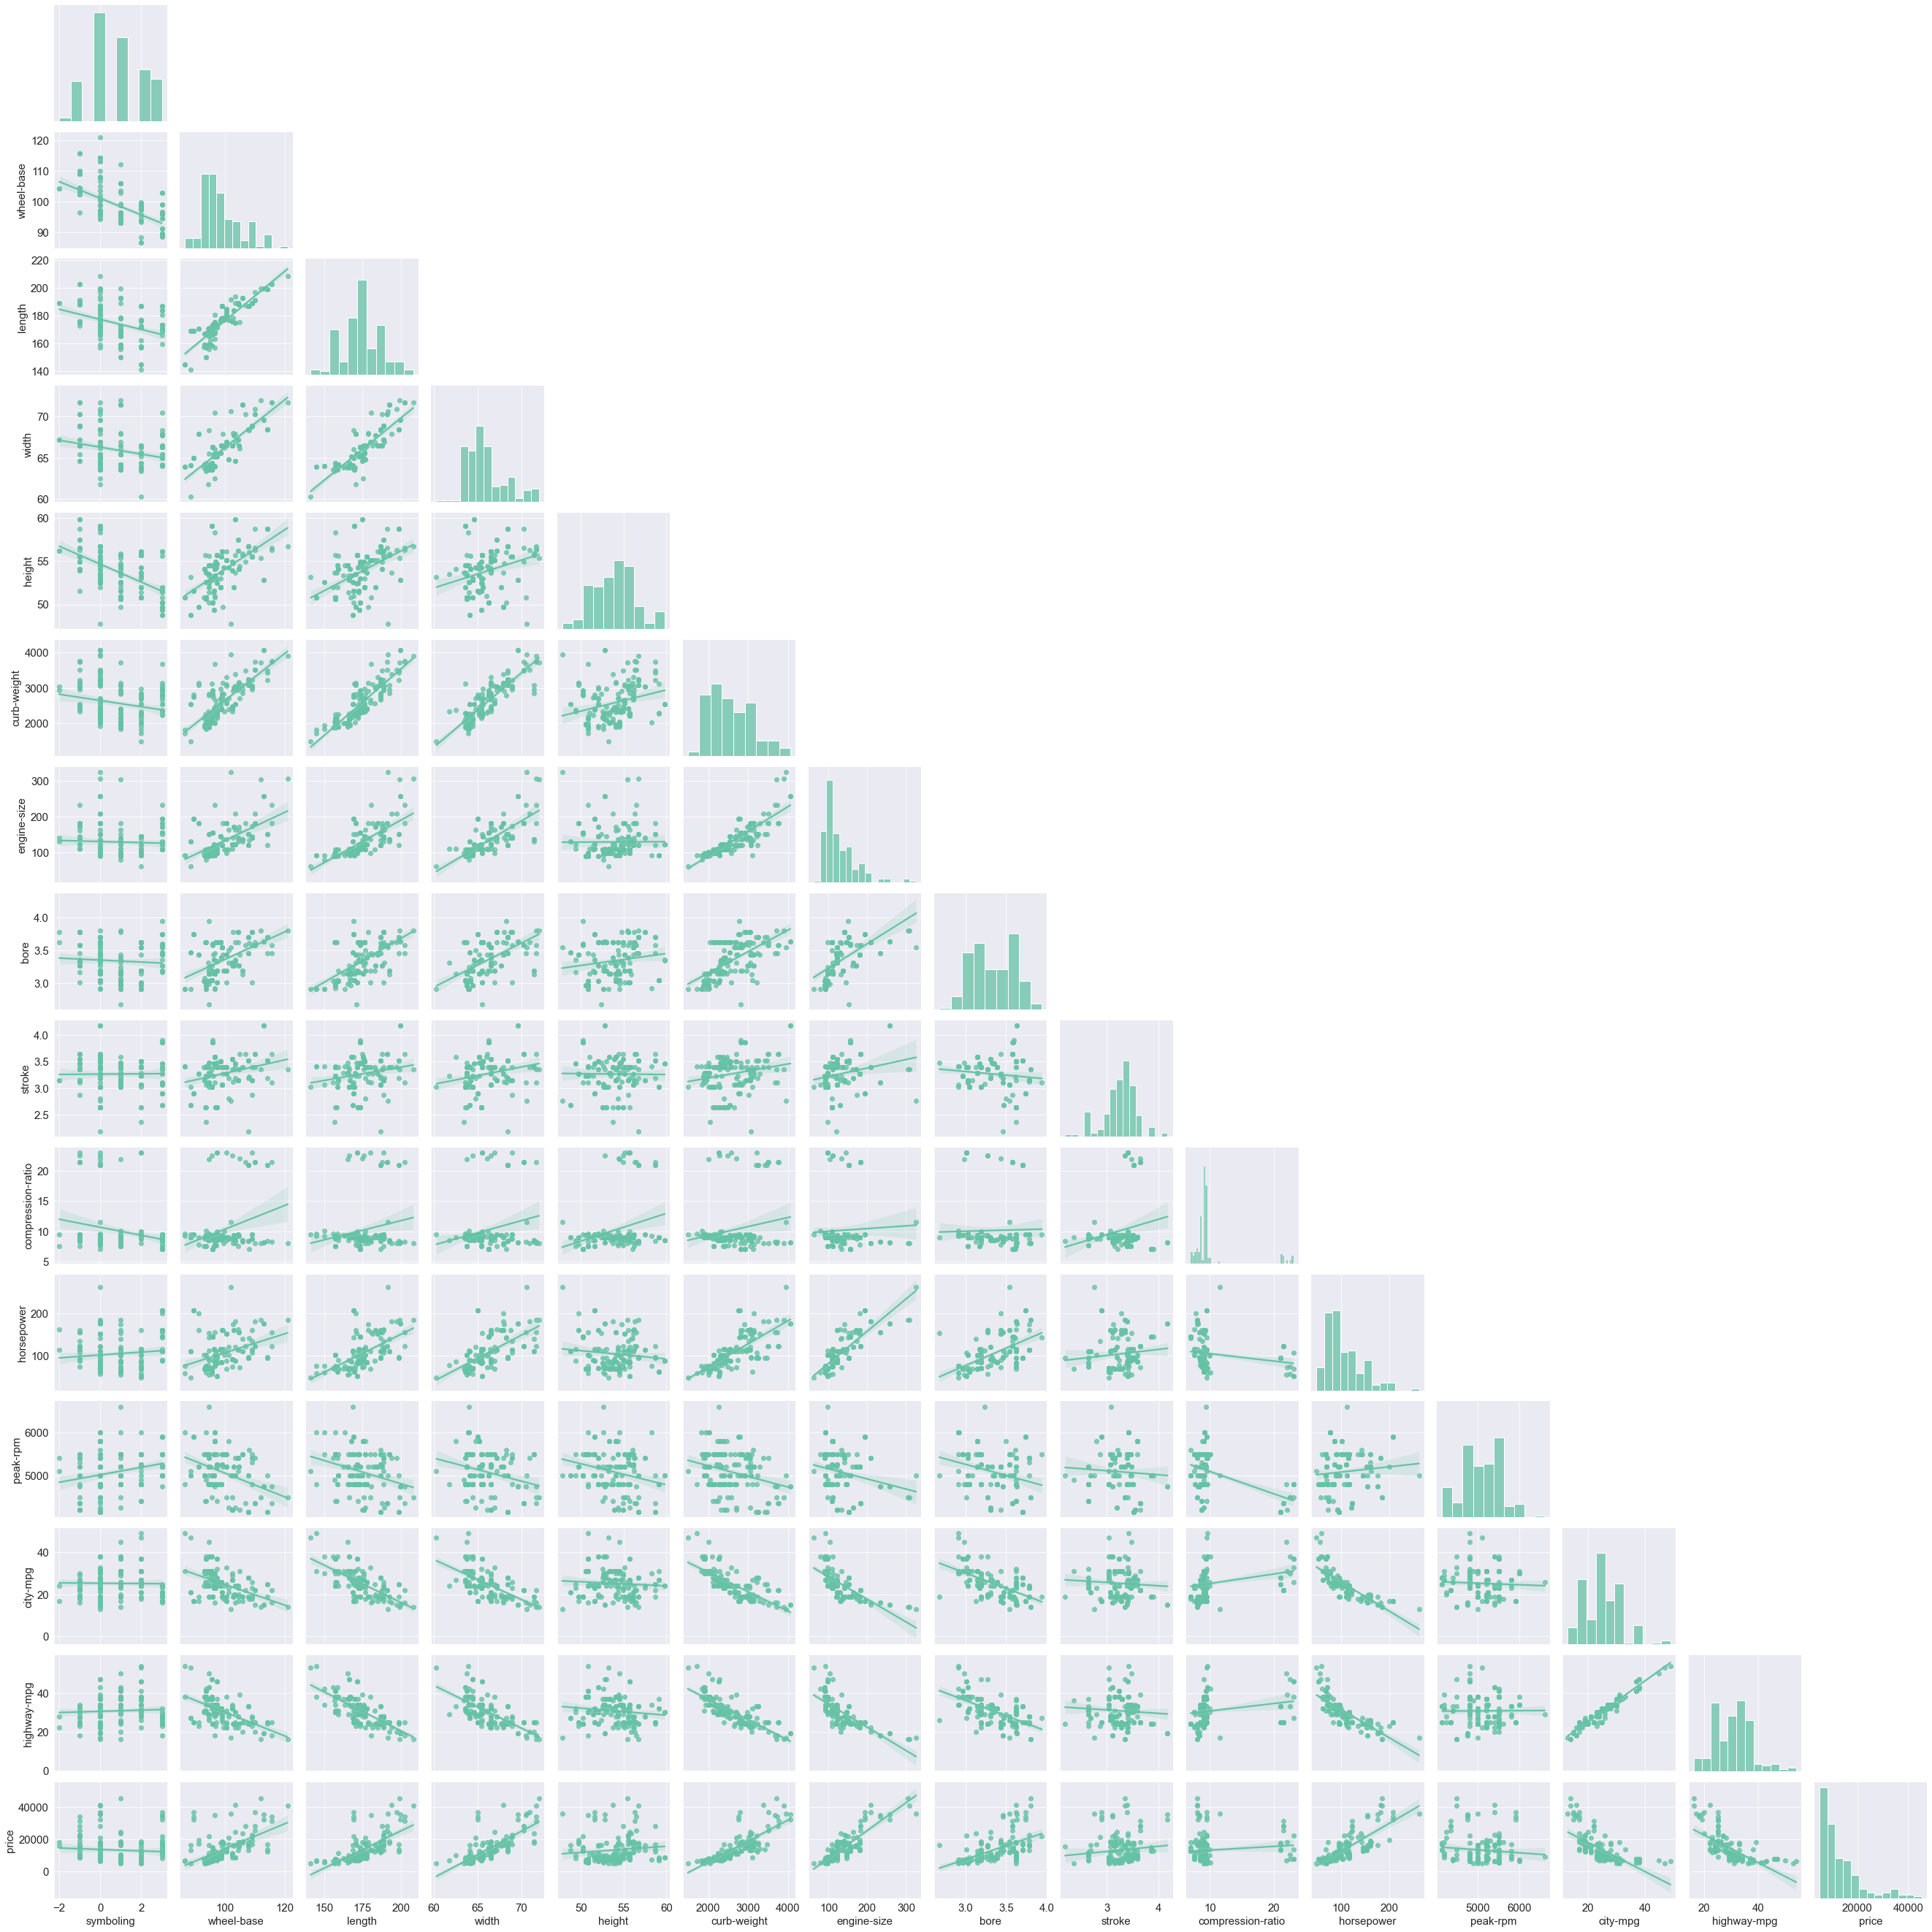

In [38]:
sns.pairplot(data=df , corner=True,kind='reg')
plt.show()
#plt.savefig('Pairplot.png',dpi=300,bbox_nches='tight')

Same observations about correlation as we saw in heatmap

## Variables that are correlated with Price variable

In [39]:
def plot_scatter(col,cols=['price']):
    fig, axes = plt.subplots(1, len(cols),figsize=(15,5))
    for i,data in enumerate(cols):
        sns.scatterplot(y=df[col],x=df['price'],hue=data,data=df,ax=axes[i])
        axes[i].legend(loc='lower right')
        axes[i].title.set_text('price vs '+col+' with '+data)
        axes[i].title.set_fontsize(18)
    fig.tight_layout()
    plt.savefig('scatterplot of '+col+'.png',dip=300,bbox_inches='tight',pad_inches=0.1)
    plt.show()
   

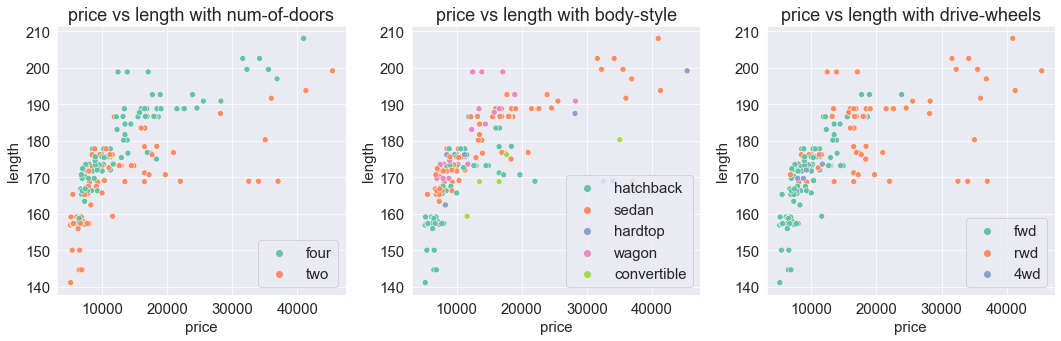

In [40]:
plot_scatter('length',['num-of-doors','body-style','drive-wheels'])

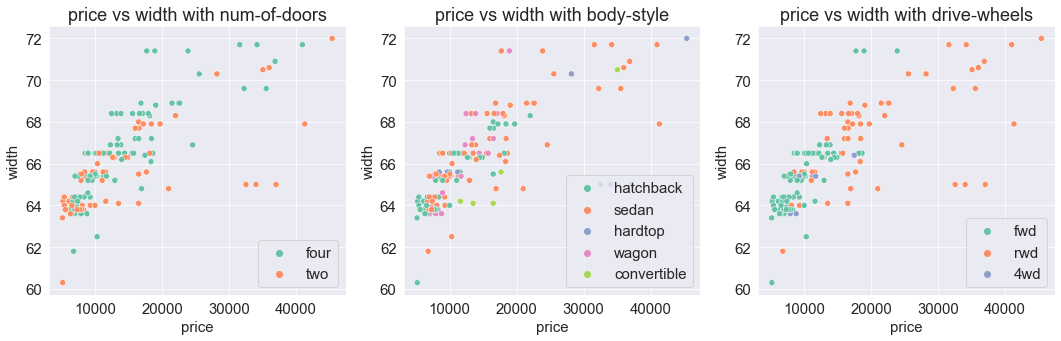

In [41]:
plot_scatter('width',['num-of-doors','body-style','drive-wheels'])

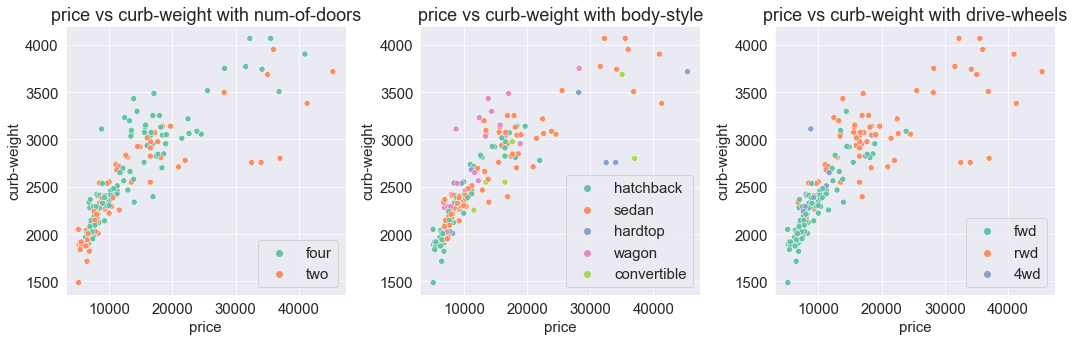

In [42]:
plot_scatter('curb-weight',['num-of-doors','body-style','drive-wheels'])

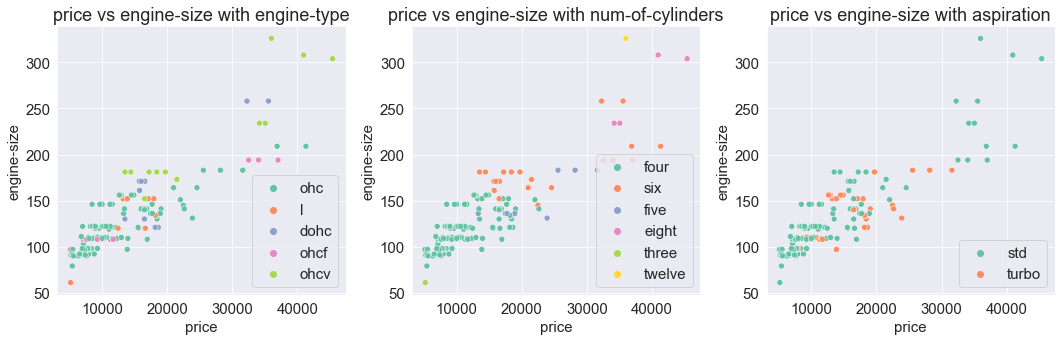

In [43]:
plot_scatter('engine-size',['engine-type','num-of-cylinders','aspiration'])

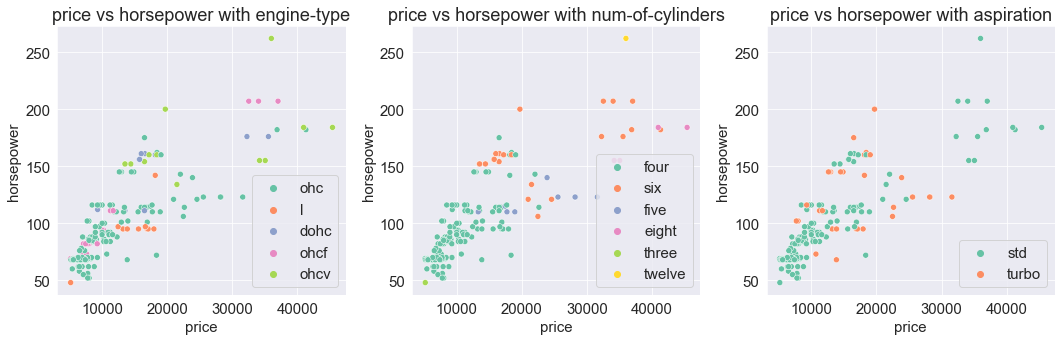

In [44]:
plot_scatter('horsepower',['engine-type','num-of-cylinders','aspiration'])

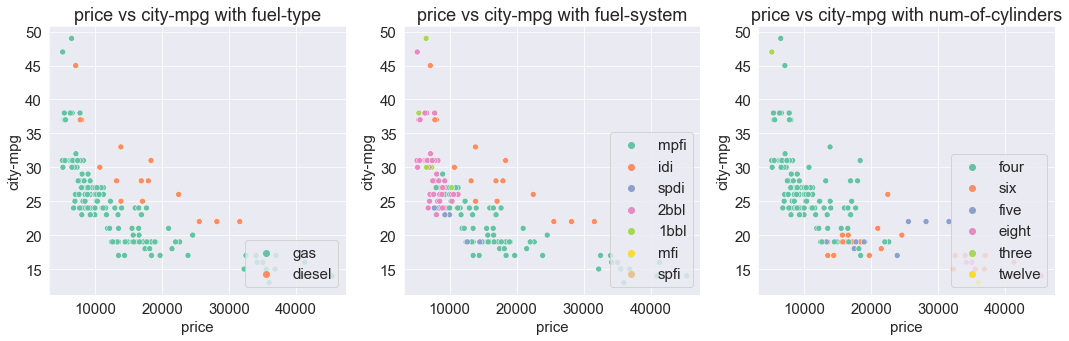

In [45]:
plot_scatter('city-mpg',['fuel-type','fuel-system','num-of-cylinders'])

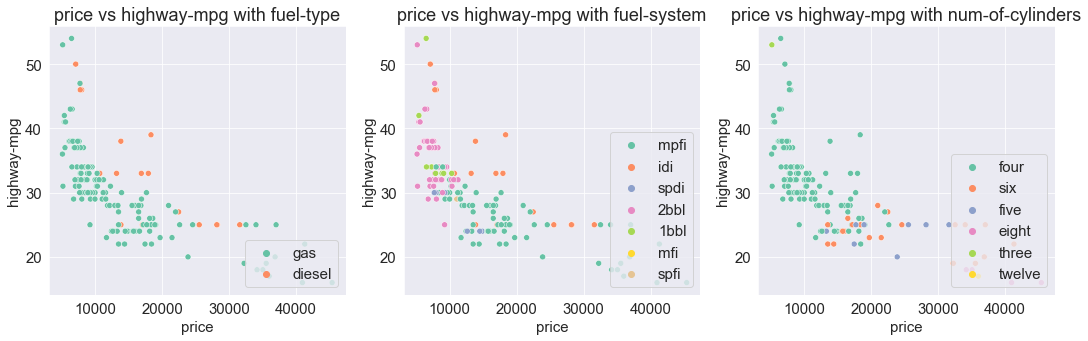

In [46]:
plot_scatter('highway-mpg',['fuel-type','fuel-system','num-of-cylinders'])

Our observations from heatmap are Confirmed<br>
Features **`length`**, **`width`**,**`engine-size`** **`curb weight`** **`horsepower`** show strong correlatio with **`Price`**

# Relationship between Independent Variables

In [47]:
def plot_hist(col,cols):
    fig,axes = plt.subplots(1,len(cols),figsize=(15,5))
    if len(cols)>1:
        for i in range(0,len(cols)):
            sns.histplot(data=df,x=col,y=cols[i],cbar=True,bins=10,ax=axes[i],pthresh=.05,pmax=.9)
            axes[i].set_title(col+' vs '+cols[i])
            axes[i].title.set_fontsize(18)
    else:
        sns.histplot(data=df,x=col,y=cols[0],cbar=True,bins=10,pthresh=.05,pmax=.9)
    fig.tight_layout()
    plt.show()

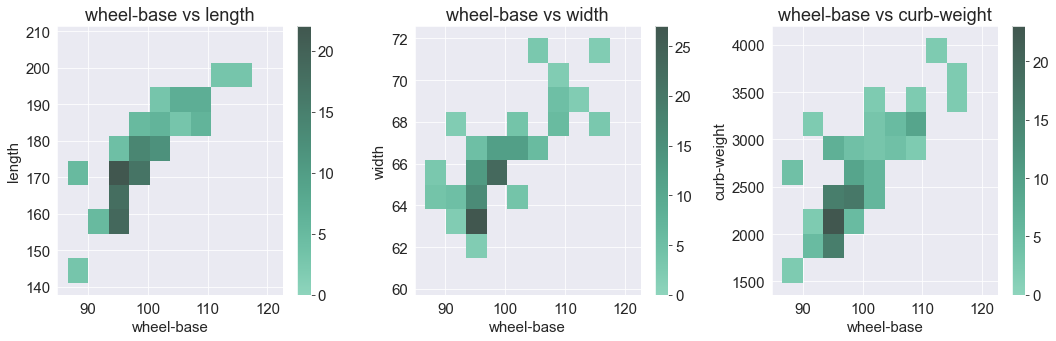

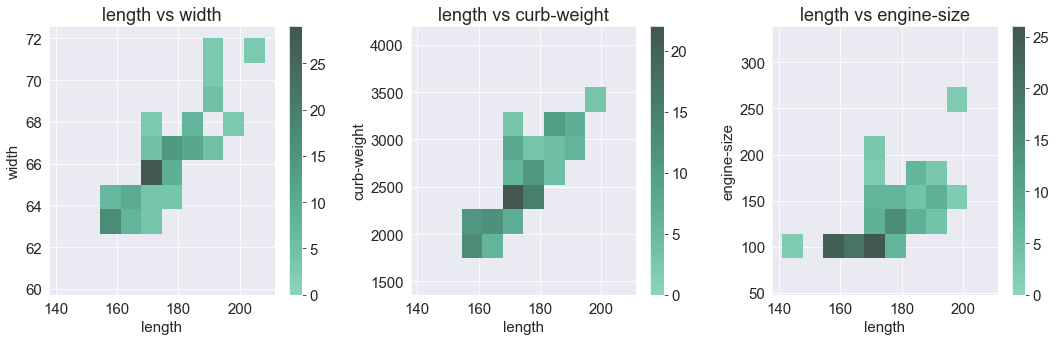

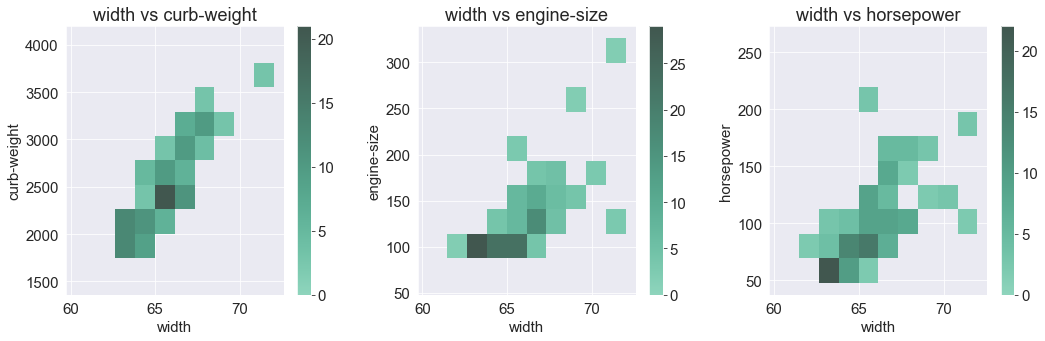

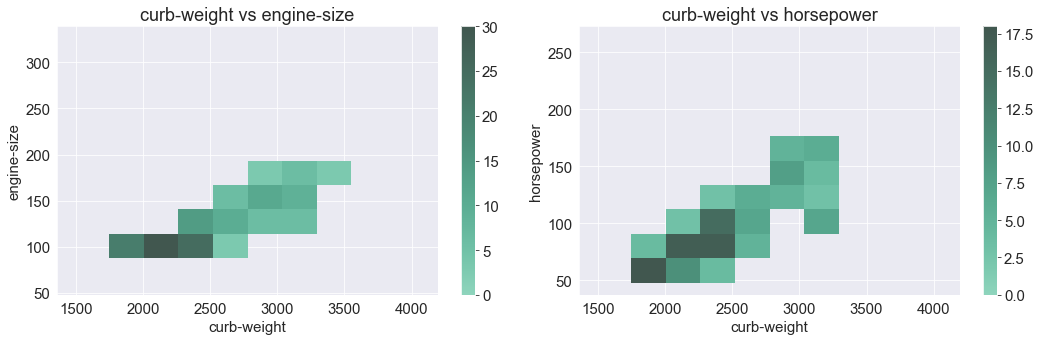

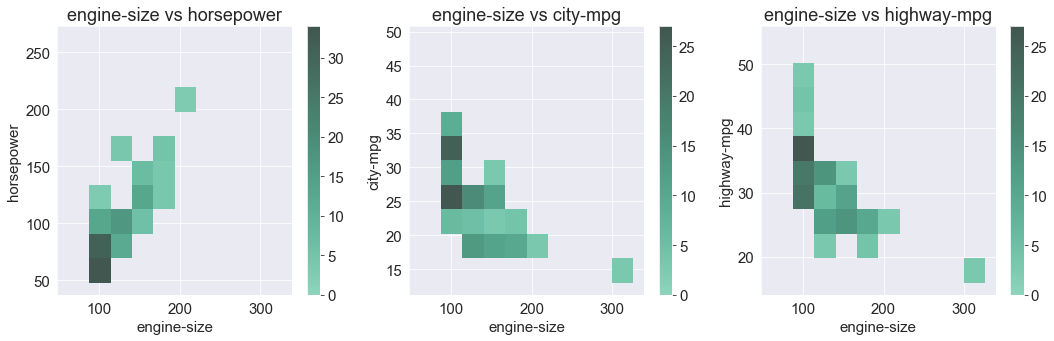

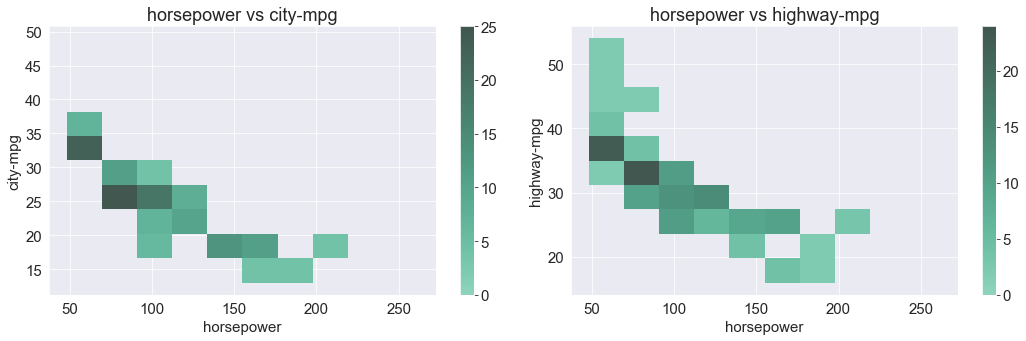

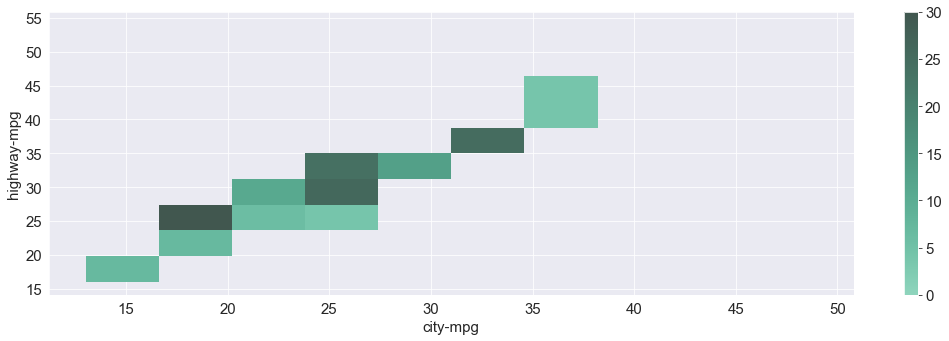

In [48]:
plot_hist('wheel-base',['length','width','curb-weight'])
plot_hist('length',['width','curb-weight','engine-size'])
plot_hist('width',['curb-weight','engine-size','horsepower'])
plot_hist('curb-weight',['engine-size','horsepower'])
plot_hist('engine-size',['horsepower','city-mpg','highway-mpg'])
plot_hist('horsepower',['city-mpg','highway-mpg'])
plot_hist('city-mpg',['highway-mpg'])

## Distribution of continuous Features

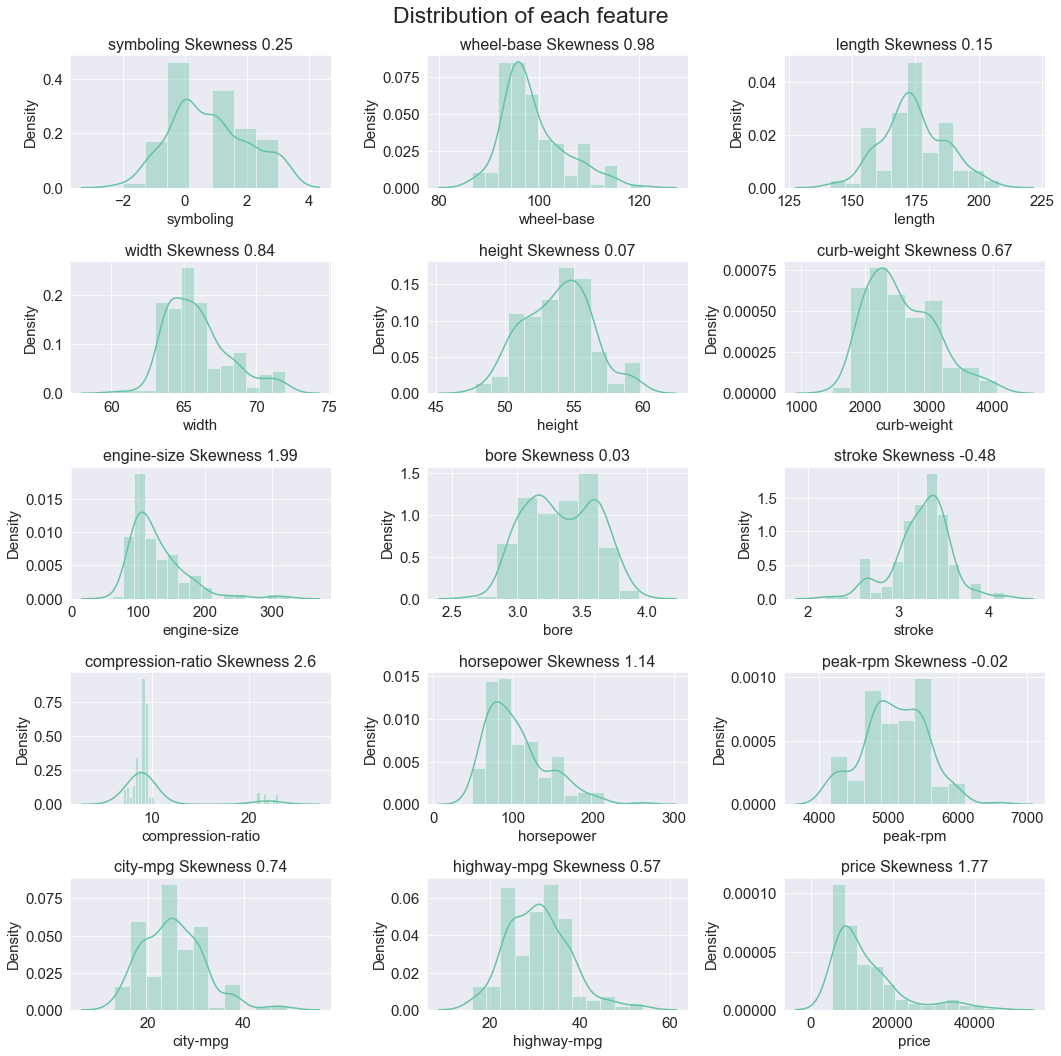

In [49]:
cols = df.describe().columns.tolist()
fig,ax = plt.subplots(5,3,figsize=(15,15))
b = 0
for i in range(0,5):
    for j in range(0,3):
        a = sns.distplot(df[cols[b]],ax = ax[i,j])
        a.set_title(cols[b]+" Skewness "+str(round(df[cols[b]].skew(axis = 0, skipna = True),2)) ,fontdict={'fontsize':16})
        b = b+1
        fig.suptitle('Distribution of each feature',size = 23)
fig.tight_layout()
plt.savefig('Distribution of Features.png',dpi=300, bbox_inches='tight',pad_inches=0.5)

**`wheel-base`** **`width`** **`engine-size`** **`compression-ratio`** **`horsepower`** have skewness
<br> Hence, we'll apply log transformation to normalize

## Categorical data Analysis

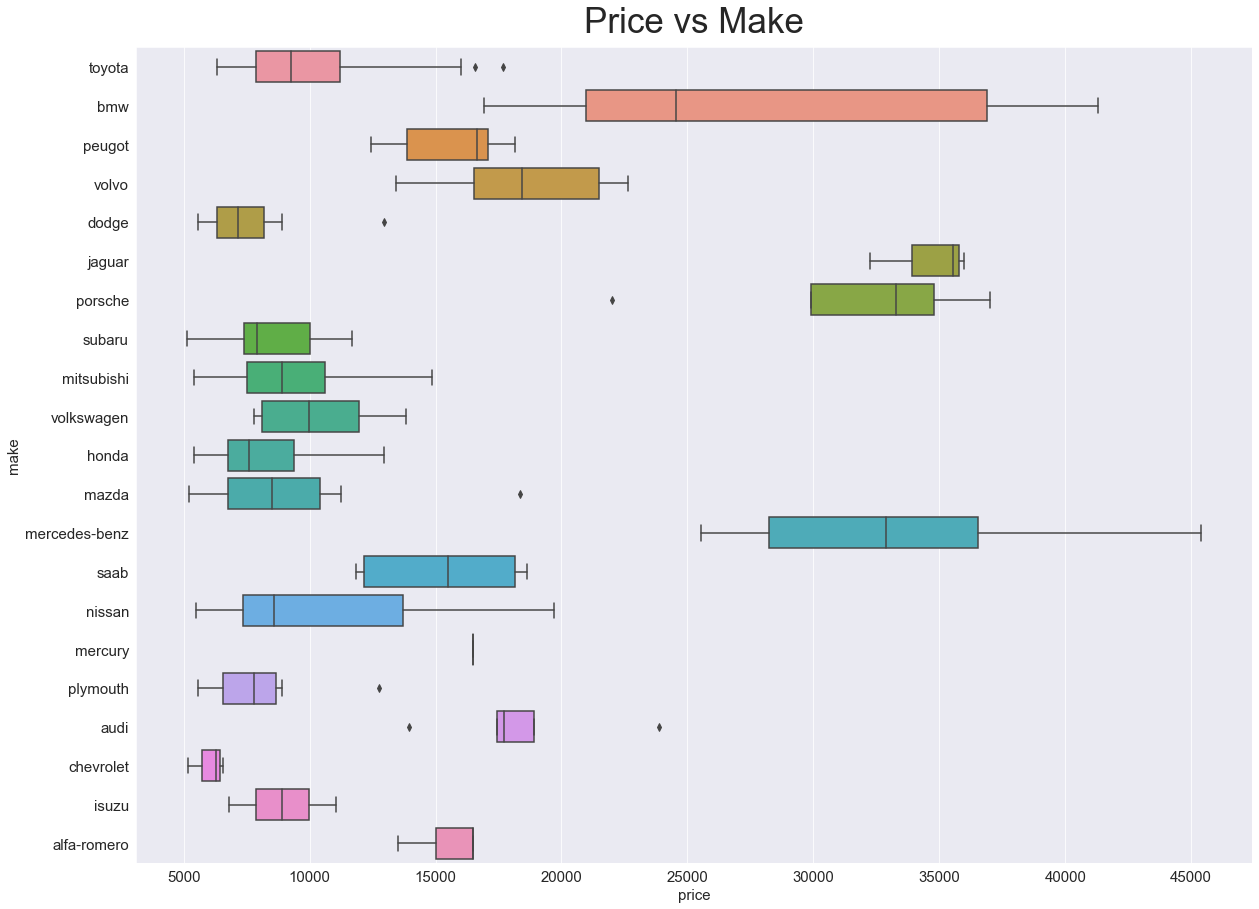

In [50]:
plt.figure(figsize=(20,15))
sns.boxplot(x='price',y='make',data=df)
plt.title('Price vs Make',fontdict={'fontsize':35},pad=15)
plt.savefig('boxplot of make.png', dpi=300, bbox_inches='tight')

We can observe that Toyota and Nissan cars prices are in range of low to medium <br>
Subaru, Mitsubishi, Honda, volkswagen, mazda all fall under low price range and also number of cars present in the dataset is also high which makes sense as people tend to buy vehicles with low price

In [51]:
'''
def plot_bar(cols=['price']):
    fig, axes = plt.subplots(len(cols),1,figsize=(15,30))
    plt.figure(figsize=(5,10))
    for i,data in enumerate(cols):
        sns.barplot(x=df[data],y=df['price'],ax=axes[i])
        axes[i].title.set_text('price vs '+data)
        axes[i].title.set_fontsize(18)
        axes[i].set_xticklabels(labels = df[data].unique(),fontsize=10,rotation=30)
    fig.tight_layout()
    plt.show()
'''
def plot_bar(cols=['price']):
    fig,ax = plt.subplots(3,3,figsize=(15,10))
    b = 0
    for i in range(0,3):
        for j in range(0,3):
            a = sns.barplot(x=df[cols[b]],y=df['price'],ax = ax[i,j])
            a.set_title(cols[b],fontdict={'fontsize':16})
            b = b+1
    fig.suptitle('Bar Plot of Features vs Price',size = 23)
    fig.tight_layout()
    plt.savefig('cat_data_output.png', dpi=300, bbox_inches='tight')
    plt.show()  
    

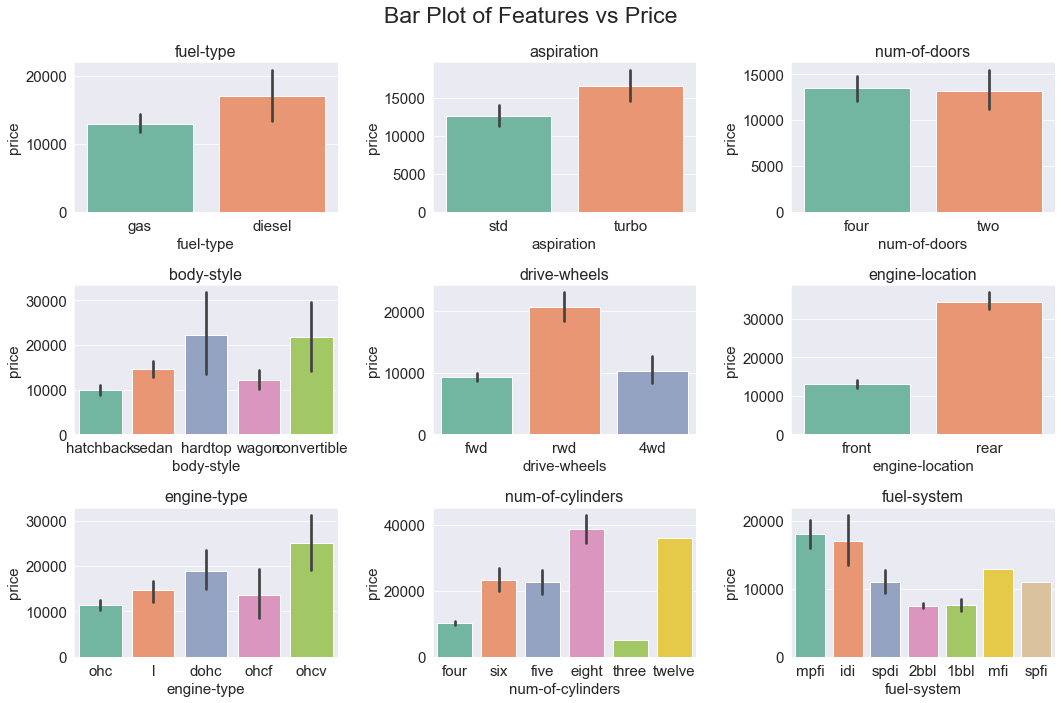

In [52]:
plot_bar(['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'])

# Insights based on EDA

<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>
    
- **Highest number of entries are of Toyota 28 entries followed by Nissan-16 entries, Subaru-12 entries, Mitsubishi-12 entries and Honda-12 entries**

*We can observe that Toyota and Nissan cars prices are in range of low to medium <br>
Subaru, Mitsubishi, Honda, volkswagen, mazda all fall under low price range and also number of cars present in the dataset is also high which makes sense as people tend to buy vehicles with low price<br><br>*

- Maximum car fuel type is gas type
- std Aspiration has maximum entries
- Vehicles with 4 doors has 101 entries and 2 doors has 72 entris
- Sedan car body stye has maximum entries 81 followed by hachback 51 entries Wagon, Hardtop and Convertible
- Vehicles with front wheel drive has mxaimum entries 104 followed rear wheel drive 61 entries. 4 wheel drive vehicles are very less
<br>
- **Maximum vehicles are of ohc engine type with 4 cylinders**

*As the price of ohc and 4 cylinder vehicles is low copared to rest options.*

- Multipoint fuel injection mpfi and 2 barrel fuel injection these are the two high counted fuel systems
<br><br>


 
-  **`wheel base`**, **`length`**, **`width`** and **`curb weight`** show strong positive correlation with each other which is reasonable as lenght of the vehicle is more it also required good width and that requires high wheel base as well
- **`Height`** show positive correlation with **`wheel base`**
- **`engine size`** shows positive strong correlattion with **`Horsepower`**,**`curb-weight`**,**`lenght`** and **`width`** which is true because for high horsepower, big engine is required
- **`bore`** show positive correlation with **`horsepower`** **`engine-size`** **`curb weight`** **`width`** and **`length`**
- **`horsepower`** show strong positive correlation with **`engine size`** **`curb weight`** **`width`** **`length`** and **`bore`**
- **`city-mpg`** and **`highway-mpg`** show strong **negative** correlation with **`length`**, **`width`**,**`engine-size`** **`curb weight`** **`bore`** and **`horsepower`** but show positive correlation with each other which is reasonable because vehicles having high power consume more fuel and reduces the mileage 
- **`price`** shows strong positive correlation with **`length`**, **`width`**,**`engine-size`** **`curb weight`** **`horsepower`** and strong negative correlation with **`city-mpg`** and **`highway-mpg`**
<br><br>
- **`wheel-base`** **`width`** **`engine-size`** **`compression-ratio`** **`horsepower`** have skewness
<br><br>
- 4 door vehicles have more length than 2 door vehicles of same price range
- rear wheel drive vehicles have more length,width and curb weight than front and 4 wheel drive
- 4 cylinder vehicles are less expensive and have low curb weight, small engine size, low horsepower and very high city and highway mileage
- ohc engine type vehicles are less expensive and have low curb weight, small engine size and low horsepower
- diesel vehicles provide high mileage than gas vehicles for the same price range
- vehicles with 2bbl fuel system are less expensive with very high mileage and mpfi fuel system vehicles are expensive wth lowest mileage
- bmw, jaguar, porche, mercedes-benz have most expensive vehicles
<br><br>
<p style = "font-size : 16px ; color: blue;font-family:TimesNewRoman">
<b>Observations based on price</b>
</p>
- Diesel vehicles are costlier than gas vehicles
- Turbo engines show high price than standard engines
- Number of doors does not make major difference in price
- hardtop and convertible vehicles are most costly
- rear wheel drive vehicles are expensive
- vehicles having rear engine location are very expensive
- eight and twelve cylinder vehicles have more price than less cylinder vehicle
- mpfi and idi fuel system ehicles have high price


# Actions to be taken based on EDA

- Drop column wheel-base, curb-weight, highway-mpg, engine-size *(Showing high collinearity with independent features)*
- Drop engine location *(biased data)*
- Perform log transform on width, horsepower and price
- Handle Categorical Data

# Feature Engineering

## Price Range Feature

<AxesSubplot:title={'center':'Make vs Price(maximum)'}, xlabel='make', ylabel='price'>

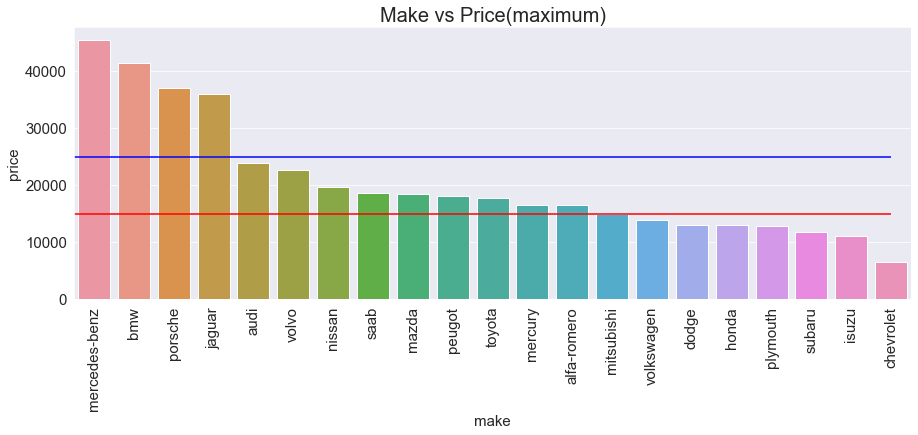

In [53]:
a = df.sort_values(['price','make'],ascending=True).groupby(by='make',as_index=False)['price'].max()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.hlines(y=15000,xmin=-2,xmax=20,colors='red')
plt.hlines(y=25000,xmin=-2,xmax=20,colors='blue')
plt.title('Make vs Price(maximum)',fontdict={'fontsize':20})
sns.barplot(x='make',y='price',data=a.sort_values(by='price',ascending=False))

<AxesSubplot:title={'center':'Make vs Price(minimum)'}, xlabel='make', ylabel='price'>

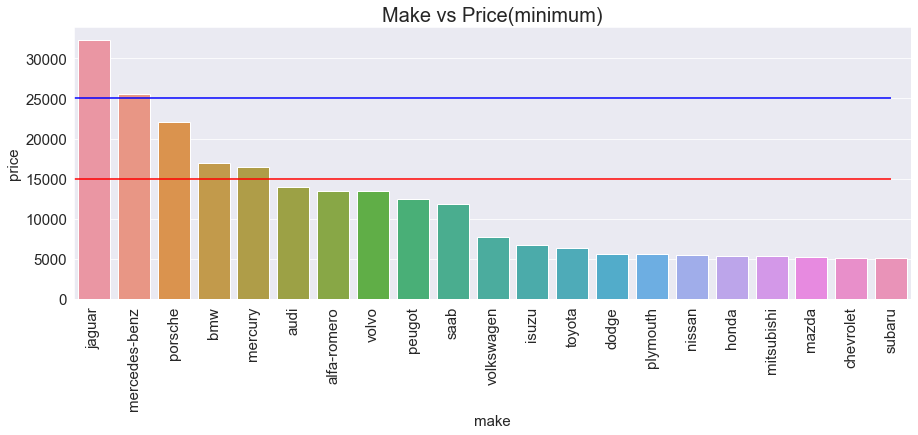

In [54]:
b = df.sort_values(['price','make'],ascending=True).groupby(by='make',as_index=False)['price'].min()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.hlines(y=15000,xmin=-2,xmax=20,colors='red')
plt.hlines(y=25000,xmin=-2,xmax=20,colors='blue')
plt.title('Make vs Price(minimum)',fontdict={'fontsize':20})
sns.barplot(x='make',y='price',data=b.sort_values(by='price',ascending=False))

In [55]:
Low = a[a.price<15000]['make'].values.tolist()
Mid = a[(a.price<25000)&(a.price>=15000)]['make'].values.tolist()
High = a[a.price>=25000]['make'].values.tolist()
print('Low Price',len(Low),*Low)
print('-'*50)
print('Mid price',len(Mid),*Mid)
print('-'*50)
print('High price',len(High),*High)

Low Price 8 chevrolet dodge honda isuzu mitsubishi plymouth subaru volkswagen
--------------------------------------------------
Mid price 9 alfa-romero audi mazda mercury nissan peugot saab toyota volvo
--------------------------------------------------
High price 4 bmw jaguar mercedes-benz porsche


In [56]:
def classrange(x):
    if x in Low:
        return "Low"
    elif x in Mid:
        return 'Mid'
    elif x in High:
        return "High"
    else: 
        return x

In [57]:
df['price_range'] = df['make'].apply(lambda x: classrange(x))
df.head(5)

symboling    make fuel-type aspiration num-of-doors body-style  \
0         -1  toyota       gas        std         four  hatchback   
1          0     bmw       gas        std          two      sedan   
2          0  peugot    diesel      turbo         four      sedan   
3         -2   volvo       gas        std         four      sedan   
4          1   dodge       gas      turbo          two  hatchback   

  drive-wheels engine-location  wheel-base  length  width  height  \
0          fwd           front       102.4   175.6   66.5    53.9   
1          rwd           front       101.2   176.8   64.8    54.3   
2          rwd           front       107.9   186.7   68.4    56.7   
3          rwd           front       104.3   188.8   67.2    56.2   
4          fwd           front        93.7   157.3   63.8    50.8   

   curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
0         2458         ohc             four          122        mpfi  3.31   
1         2710         ohc              six          164        mpfi  3.31   
2         3197           l             four          152         idi  3.70   
3         2935         ohc             four          141        mpfi  3.78   
4         2128         ohc             four           98        mpfi  3.03   

   stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
0    3.54                8.7          92      4200        27           32   
1    3.19                9.0         121      4250        21           28   
2    3.52               21.0          95      4150        28           33   
3    3.15                9.5         114      5400        24           28   
4    3.39                7.6         102      5500        24           30   

   price price_range  
0  11248         Mid  
1  20970        High  
2  13200         Mid  
3  15985         Mid  
4   7957         Low

# Post Data Processing

In [58]:
df.drop(['make','wheel-base','curb-weight','highway-mpg','engine-location','engine-size'],axis=1,inplace=True)

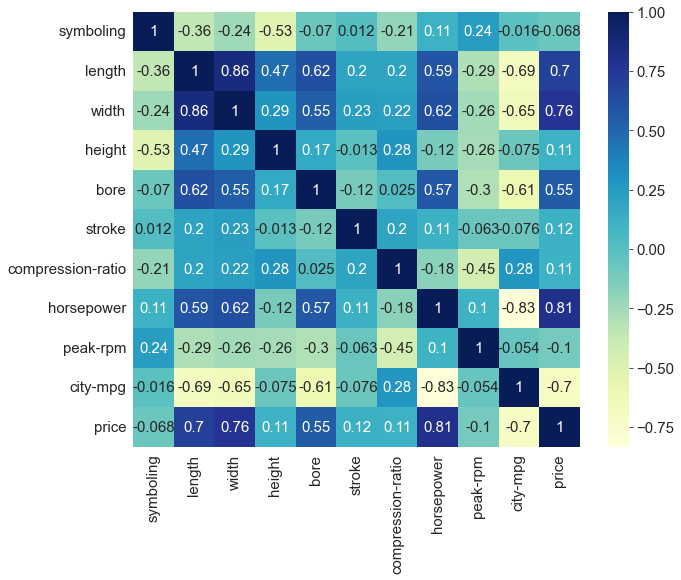

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True ,cmap="YlGnBu" )
plt.show()

## Perform Log-transform

In [60]:
def perform_log_transform(df,cols):
    '''
    '''
    for col in cols:
        df[col+'_log'] = np.log(df[col])
        df.drop(col,axis=1,inplace=True)
    df.info()

In [61]:
perform_log_transform(df,['horsepower','width','price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          173 non-null    int64  
 1   fuel-type          173 non-null    object 
 2   aspiration         173 non-null    object 
 3   num-of-doors       173 non-null    object 
 4   body-style         173 non-null    object 
 5   drive-wheels       173 non-null    object 
 6   length             173 non-null    float64
 7   height             173 non-null    float64
 8   engine-type        173 non-null    object 
 9   num-of-cylinders   173 non-null    object 
 10  fuel-system        173 non-null    object 
 11  bore               173 non-null    float64
 12  stroke             173 non-null    float64
 13  compression-ratio  173 non-null    float64
 14  peak-rpm           173 non-null    int64  
 15  city-mpg           173 non-null    int64  
 16  price_range        173 non

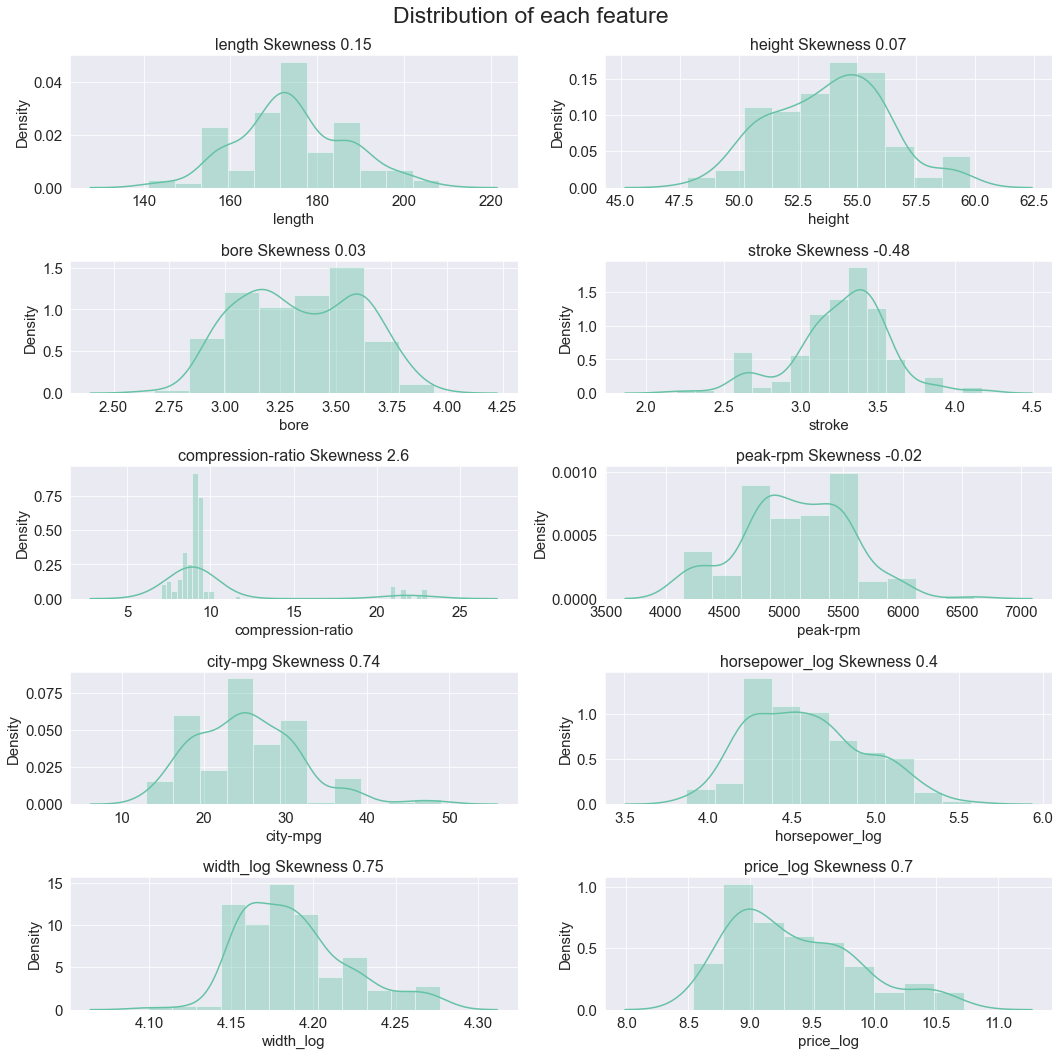

In [62]:
cols = df.describe().columns.tolist()
fig,ax = plt.subplots(5,2,figsize=(15,15))
b = 1
for i in range(0,5):
    for j in range(0,2):
        a = sns.distplot(df[cols[b]],ax = ax[i,j])
        a.set_title(cols[b]+" Skewness "+str(round(df[cols[b]].skew(axis = 0, skipna = True),2)) ,fontdict={'fontsize':16})
        b = b+1
        fig.suptitle('Distribution of each feature',size = 23)
fig.tight_layout()
plt.show()
#plt.savefig('Distribution of Features.png')

In [63]:
df.head()

symboling fuel-type aspiration num-of-doors body-style drive-wheels  \
0         -1       gas        std         four  hatchback          fwd   
1          0       gas        std          two      sedan          rwd   
2          0    diesel      turbo         four      sedan          rwd   
3         -2       gas        std         four      sedan          rwd   
4          1       gas      turbo          two  hatchback          fwd   

   length  height engine-type num-of-cylinders fuel-system  bore  stroke  \
0   175.6    53.9         ohc             four        mpfi  3.31    3.54   
1   176.8    54.3         ohc              six        mpfi  3.31    3.19   
2   186.7    56.7           l             four         idi  3.70    3.52   
3   188.8    56.2         ohc             four        mpfi  3.78    3.15   
4   157.3    50.8         ohc             four        mpfi  3.03    3.39   

   compression-ratio  peak-rpm  city-mpg price_range  horsepower_log  \
0                8.7      4200        27         Mid        4.521789   
1                9.0      4250        21        High        4.795791   
2               21.0      4150        28         Mid        4.553877   
3                9.5      5400        24         Mid        4.736198   
4                7.6      5500        24         Low        4.624973   

   width_log  price_log  
0   4.197202   9.327946  
1   4.171306   9.950848  
2   4.225373   9.487972  
3   4.207673   9.679406  
4   4.155753   8.981807

### Handle categorical features

In [64]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x

In [65]:
#df = encode_cat_vars(df)

In [66]:
def cat_data(col):
    d = {}
    for i,data in enumerate(df[col].value_counts().index.tolist()):
        print(i,data)
        d[data] = i
    return d

In [67]:
drive_wheels_dict = cat_data('drive-wheels')
print()
aspiration_dict = cat_data('aspiration')
print()
fuel_type_dict = cat_data('fuel-type')
print()
num_of_doors_dict = cat_data('num-of-doors')
print()
body_style_dict = cat_data('body-style')

0 fwd
1 rwd
2 4wd

0 std
1 turbo

0 gas
1 diesel

0 four
1 two

0 sedan
1 hatchback
2 wagon
3 hardtop
4 convertible


In [68]:
body_style_dict

{'sedan': 0, 'hatchback': 1, 'wagon': 2, 'hardtop': 3, 'convertible': 4}

In [69]:
body_style_dict['convertible'] = 3

In [70]:
engine_type_dict = {'ohc':1,'ohcf':0,'ohcv':0,'dohc':0,'l':0}
num_of_cylinders_dict = {'four':1,'six':2,'five':0,'eight':0,'three':0,'twelve':0}
fuel_system_dict = {'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':3,'mfi':3,'spfi':3}
price_range_dict = {'High':0,'Mid':1,'Low':2}

In [71]:
df = df.replace(drive_wheels_dict)
df = df.replace(aspiration_dict)
df = df.replace(fuel_type_dict)
df = df.replace(num_of_doors_dict)
df = df.replace(body_style_dict)
df = df.replace(engine_type_dict)
df = df.replace(num_of_cylinders_dict)
df = df.replace(fuel_system_dict)
df = df.replace(price_range_dict)

In [72]:
df.head(7)

symboling  fuel-type  aspiration  num-of-doors  body-style  drive-wheels  \
0         -1          0           0             0           1             0   
1          0          0           0             1           0             1   
2          0          1           1             0           0             1   
3         -2          0           0             0           0             1   
4          1          0           1             1           1             0   
5          0          0           0             0           0             1   
6          3          0           0             1           3             1   

   length  height  engine-type  num-of-cylinders  fuel-system  bore  stroke  \
0   175.6    53.9            1                 0            0  3.31    3.54   
1   176.8    54.3            1                 2            0  3.31    3.19   
2   186.7    56.7            0                 0            2  3.70    3.52   
3   188.8    56.2            1                 0            0  3.78    3.15   
4   157.3    50.8            1                 0            0  3.03    3.39   
5   199.6    52.8            0                 2            0  3.63    4.17   
6   168.9    51.6            0                 2            0  3.74    2.90   

   compression-ratio  peak-rpm  city-mpg  price_range  horsepower_log  \
0                8.7      4200        27            1        4.521789   
1                9.0      4250        21            0        4.795791   
2               21.0      4150        28            1        4.553877   
3                9.5      5400        24            1        4.736198   
4                7.6      5500        24            2        4.624973   
5                8.1      4750        15            0        5.170484   
6                9.5      5900        17            0        5.332719   

   width_log  price_log  
0   4.197202   9.327946  
1   4.171306   9.950848  
2   4.225373   9.487972  
3   4.207673   9.679406  
4   4.155753   8.981807  
5   4.242765  10.381273  
6   4.174387  10.389857

## Feature Scaling

In [73]:
def scale_data(data=None):
    sc = StandardScaler()
    sc_data=sc.fit_transform(data)
    return pd.DataFrame(data=sc_data,columns=data.columns)

In [74]:
x_dash = scale_data(df[['length','height','bore','stroke','peak-rpm','city-mpg','compression-ratio']])
for i in x_dash.columns.tolist():
    df[i] = x_dash[i]
df.head()

symboling  fuel-type  aspiration  num-of-doors  body-style  drive-wheels  \
0         -1          0           0             0           1             0   
1          0          0           0             1           0             1   
2          0          1           1             0           0             1   
3         -2          0           0             0           0             1   
4          1          0           1             1           1             0   

     length    height  engine-type  num-of-cylinders  fuel-system      bore  \
0  0.103185  0.031778            1                 0            0 -0.109237   
1  0.199373  0.195885            1                 2            0 -0.109237   
2  0.992927  1.180530            0                 0            2  1.356015   
3  1.161256  0.975396            1                 0            0  1.656580   
4 -1.363687 -1.240055            1                 0            0 -1.161213   

     stroke  compression-ratio  peak-rpm  city-mpg  price_range  \
0  0.899214          -0.363238 -1.936704  0.268072            1   
1 -0.248981          -0.287074 -1.827460 -0.675177            0   
2  0.833603           2.759477 -2.045947  0.425280            1   
3 -0.380203          -0.160135  0.685140 -0.203553            1   
4  0.407131          -0.642505  0.903627 -0.203553            2   

   horsepower_log  width_log  price_log  
0        4.521789   4.197202   9.327946  
1        4.795791   4.171306   9.950848  
2        4.553877   4.225373   9.487972  
3        4.736198   4.207673   9.679406  
4        4.624973   4.155753   8.981807

In [75]:
df.info(verbose=True,memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          173 non-null    int64  
 1   fuel-type          173 non-null    int64  
 2   aspiration         173 non-null    int64  
 3   num-of-doors       173 non-null    int64  
 4   body-style         173 non-null    int64  
 5   drive-wheels       173 non-null    int64  
 6   length             173 non-null    float64
 7   height             173 non-null    float64
 8   engine-type        173 non-null    int64  
 9   num-of-cylinders   173 non-null    int64  
 10  fuel-system        173 non-null    int64  
 11  bore               173 non-null    float64
 12  stroke             173 non-null    float64
 13  compression-ratio  173 non-null    float64
 14  peak-rpm           173 non-null    float64
 15  city-mpg           173 non-null    float64
 16  price_range        173 non

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checking_vif(df):
    vif = pd.DataFrame()
    vif["feature"] = df.columns
    vif["VIF"] = [
        variance_inflation_factor(df.values, i) for i in range(len(df.columns))
    ]
    return vif

In [77]:
a = checking_vif(df)
print(a[a['VIF']>15])
print('**************************************')
print(a[a['VIF']<15])
cols = list(a[a['VIF']<15]['feature'].values)
cols.append('price_log')
data = df[cols]

              feature          VIF
1           fuel-type   110.055550
13  compression-ratio    84.542342
17     horsepower_log  3292.258634
18          width_log  4378.068887
19          price_log  3382.887830
**************************************
             feature        VIF
0          symboling   3.212176
2         aspiration   3.917909
3       num-of-doors   4.283609
4         body-style   2.469551
5       drive-wheels   2.938706
6             length   7.256132
7             height   2.385569
8        engine-type   8.808131
9   num-of-cylinders   2.886239
10       fuel-system   4.273916
11              bore   3.329305
12            stroke   2.936556
14          peak-rpm   2.215401
15          city-mpg   8.677170
16       price_range  14.292771


In [78]:
cols

['symboling',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'length',
 'height',
 'engine-type',
 'num-of-cylinders',
 'fuel-system',
 'bore',
 'stroke',
 'peak-rpm',
 'city-mpg',
 'price_range',
 'price_log']

We have many features whose VIF is higher than 10 

In [79]:
'''
def scale_data(data=None):
    sc = StandardScaler()
    sc_data=sc.fit_transform(data)
    return pd.DataFrame(data=sc_data,columns=data.columns)
'''

'\ndef scale_data(data=None):\n    sc = StandardScaler()\n    sc_data=sc.fit_transform(data)\n    return pd.DataFrame(data=sc_data,columns=data.columns)\n'

In [80]:
X = data.drop('price_log',axis=1).values
y = data['price_log'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [81]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (138, 15)
y_train shape:  (138,)

Test cases as below
X_test shape:  (35, 15)
y_test shape:  (35,)


## Model development and Evaluation

In [82]:
mae = []
mse = []
rmse = []
r2 = []
adj_r2 = []
model_name = []

In [83]:
def print_metrics(model,y_train,y_test,y_pred_train,y_pred_test):
    model_name.append(model)
    MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE for training set is {}'.format(MAE_train))
    print('MAE for test set is {}'.format(MAE_test))
    mae.append(MAE_test)
    print()
    MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
    print('MSE for training set is {}'.format(MSE_train))
    print('MSE for test set is {}'.format(MSE_test))
    mse.append(MSE_test)
    print()
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
    rmse.append(RMSE_test)
    print()
    r2_train = metrics.r2_score(y_train,y_pred_train)
    r2_test = metrics.r2_score(y_test,y_pred_test)
    print("R2 score for training set is {}".format(r2_train))
    print("R2 score for test set is {}".format(r2_test))
    r2.append(r2_test)
    print()
    adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))
    print("Adjusted R2 score for test set is {}".format(adj_r_squared_test))
    adj_r2.append(adj_r_squared_test)

In [145]:
def plot_lineplot(y_test,y_pred_test,name):
    plt.figure(figsize=(14,3))
    sns.lineplot(x=pd.DataFrame(y_pred_test).index,y=np.exp(y_pred_test).tolist(),legend='brief')
    sns.lineplot(x=pd.DataFrame(y_test).index,y=np.exp(y_test).tolist(),legend='brief')
    plt.legend(['Predicted','Actual'],bbox_to_anchor=(1, 0.5),title='Values',title_fontsize=30,loc='center left')
    plt.title('Line Plot of Price : Actual Vs Predicted - '+name,fontdict={'fontsize':25})
    plt.xlabel('ID',fontdict={'fontsize':20})
    plt.ylabel('Price',fontdict={'fontsize':20})
    plt.savefig(name+'.jpg',dpi=300,bbox_inches='tight')
    plt.show()

## Regression models
<br>
    1. Linear Regression<br>
    2. Ridge Regresion<br>
    3. Elastic Net<br>
    4. Decision Tree Regression<br>
    5. Random Forest Regression<br>

## Linear Regression

In [146]:
linreg = LinearRegression(n_jobs=-1)
linreg.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [147]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [148]:
print_metrics('Linear Regresion',y_train,y_test,y_pred_train,y_pred_test)

MAE for training set is 0.1506125833549533
MAE for test set is 0.17737349453125703

MSE for training set is 0.03538587515414075
MSE for test set is 0.0521583786881416

RMSE for training set is 0.18811133712283465
RMSE for test set is 0.22838208924550454

R2 score for training set is 0.8513765750260802
R2 score for test set is 0.856523516338951

Adjusted R2 score for training set is 0.8331032031030573
Adjusted R2 score for test set is 0.7432526081854911


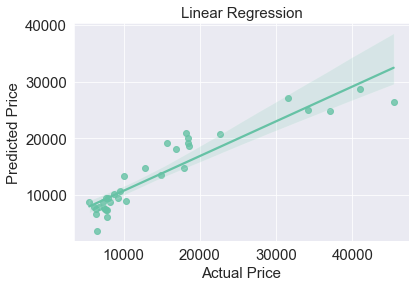

In [149]:
sns.regplot(x=np.exp(y_test),y=np.exp(y_pred_test))
plt.title('Linear Regression',fontdict={'fontsize':15})
plt.xlabel('Actual Price',fontdict={'fontsize':15})
plt.ylabel('Predicted Price',fontdict={'fontsize':15})
plt.savefig('Linear regression.png',dpi=300,bbox_inches='tight')
plt.show()

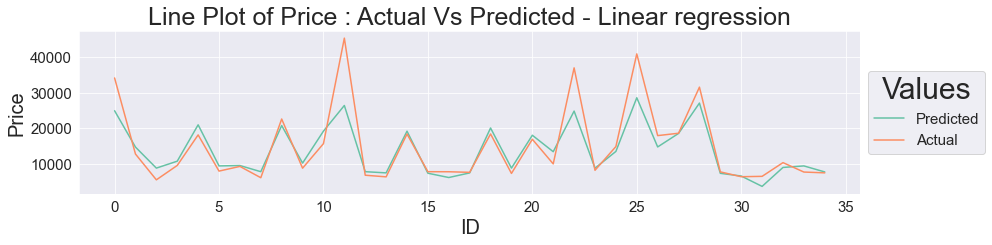

In [150]:
plot_lineplot(y_test,y_pred_test,'Linear regression')

### Ridge Regression

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

parameter_space = {
    "alpha": [0.01,0.1,0.5,1, 10, 100, 290, 500],
    "fit_intercept": [True, False],
    "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

clf = GridSearchCV(Ridge(random_state=3), parameter_space, n_jobs=4,
                   cv=3, scoring="neg_root_mean_squared_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 10, 'fit_intercept': True, 'solver': 'sag'}


In [152]:
ridge_model = Ridge(random_state=3, **clf.best_params_)
ridge_model.fit(X_train,y_train)

Ridge(alpha=10, random_state=3, solver='sag')

In [153]:
y_pred_train = ridge_model.predict(X_train) 
y_pred_test = ridge_model.predict(X_test) 

In [154]:
print_metrics('Ridge Regression',y_train,y_test,y_pred_train,y_pred_test)

MAE for training set is 0.15031312599546048
MAE for test set is 0.181629348454606

MSE for training set is 0.03688665917790341
MSE for test set is 0.05408585913445938

RMSE for training set is 0.19205899921092845
RMSE for test set is 0.23256366684084465

R2 score for training set is 0.8450731655219734
R2 score for test set is 0.8512214321155014

Adjusted R2 score for training set is 0.8260247842336914
Adjusted R2 score for test set is 0.7337646679961604


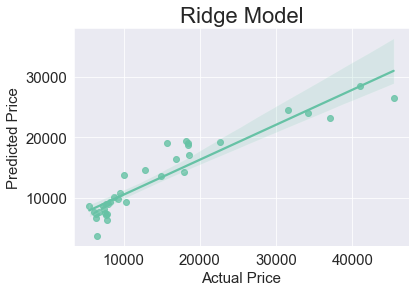

In [155]:
sns.regplot(x=np.exp(y_test),y=np.exp(y_pred_test))
plt.title('Ridge Model',fontdict={'fontsize':22})
plt.xlabel('Actual Price',fontdict={'fontsize':15})
plt.ylabel('Predicted Price',fontdict={'fontsize':15})
plt.savefig('Ridge Model.png',dpi=300,bbox_inches='tight')
plt.show()

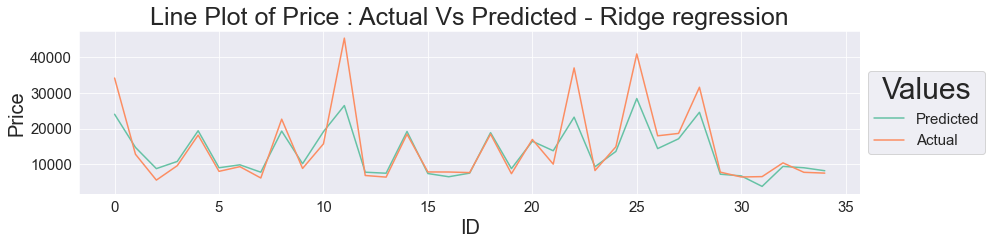

In [156]:
plot_lineplot(y_test,y_pred_test,'Ridge regression')

### Elastic Net

In [157]:
from sklearn.linear_model import ElasticNet

parameter_space = {
    "alpha": [1, 10, 100, 280, 500],
    "l1_ratio": np.arange(0.1,1,0.1),
    "fit_intercept": [True, False],
}

clf = GridSearchCV(ElasticNet(random_state=3), parameter_space, 
                   n_jobs=4, cv=3, scoring="neg_root_mean_squared_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 1, 'fit_intercept': True, 'l1_ratio': 0.1}


In [158]:
elasticNet_model = ElasticNet(random_state=3, **clf.best_params_)
elasticNet_model.fit(X_train, y_train)

ElasticNet(alpha=1, l1_ratio=0.1, random_state=3)

In [159]:
y_pred_train = elasticNet_model.predict(X_train) 
y_pred_test = elasticNet_model.predict(X_test) 

In [160]:
print_metrics('Elastic Net',y_train,y_test,y_pred_train,y_pred_test)

MAE for training set is 0.2607791925813912
MAE for test set is 0.3178330472628472

MSE for training set is 0.10639985373579897
MSE for test set is 0.1557101446111499

RMSE for training set is 0.3261899044050857
RMSE for test set is 0.3946012476046546

R2 score for training set is 0.5531123475099895
R2 score for test set is 0.5716748760014567

Adjusted R2 score for training set is 0.4981671443349882
Adjusted R2 score for test set is 0.23352346231839627


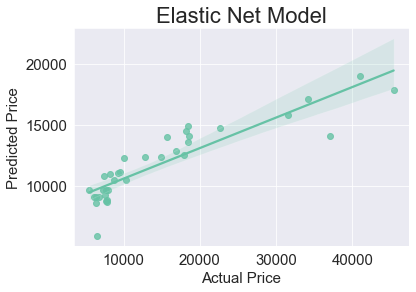

In [161]:
sns.regplot(x=np.exp(y_test),y=np.exp(y_pred_test))
plt.title('Elastic Net Model',fontdict={'fontsize':22})
plt.xlabel('Actual Price',fontdict={'fontsize':15})
plt.ylabel('Predicted Price',fontdict={'fontsize':15})
plt.savefig('Elastic Net.png',dpi=300,bbox_inches='tight')
plt.show()

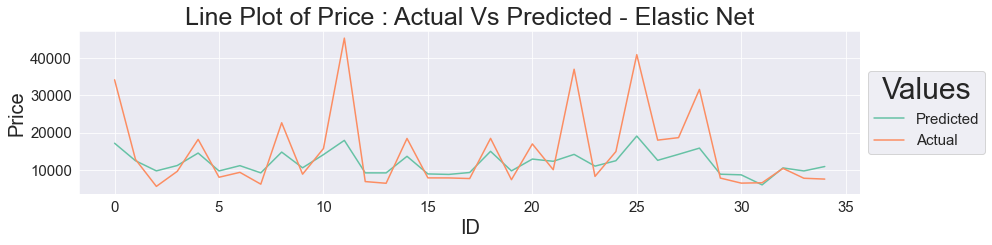

In [162]:
plot_lineplot(y_test,y_pred_test,'Elastic Net')

## Decision Tree Model

In [163]:
from sklearn.tree import DecisionTreeRegressor

parameter_space = \
    {
        "criterion": ["mse", "friedman_mse", "mae"],
        "min_samples_split": np.arange(4,50,2),
        "min_samples_leaf": np.arange(1,30,1),
        "max_features": [20, 50, 150, 200, X_train.shape[1]],
    }

clf = GridSearchCV(DecisionTreeRegressor(random_state=3), parameter_space, 
                   cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'criterion': 'mse', 'max_features': 15, 'min_samples_leaf': 3, 'min_samples_split': 8}


In [164]:
dt_model = DecisionTreeRegressor(**clf.best_params_)

In [165]:
dt_model.fit(X_train, y_train);

In [166]:
y_pred_train = dt_model.predict(X_train) 
y_pred_test = dt_model.predict(X_test) 

In [167]:
print_metrics('Decision Tree',y_train,y_test,y_pred_train,y_pred_test)

MAE for training set is 0.07751444893379533
MAE for test set is 0.14738461569442082

MSE for training set is 0.011913514282190958
MSE for test set is 0.031050428888668595

RMSE for training set is 0.10914904618085748
RMSE for test set is 0.1762113188437922

R2 score for training set is 0.9499623143872497
R2 score for test set is 0.9145869471949962

Adjusted R2 score for training set is 0.9438101399266656
Adjusted R2 score for test set is 0.8471555897173617


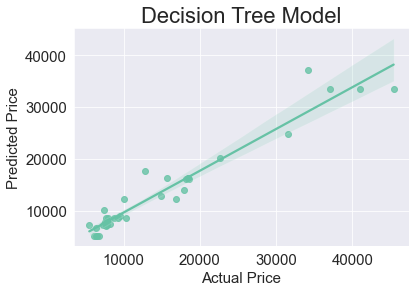

In [168]:
sns.regplot(x=np.exp(y_test),y=np.exp(y_pred_test))
plt.title('Decision Tree Model',fontdict={'fontsize':22})
plt.xlabel('Actual Price',fontdict={'fontsize':15})
plt.ylabel('Predicted Price',fontdict={'fontsize':15})
plt.savefig('Decision Tree.png',dpi=300,bbox_inches='tight')
plt.show()

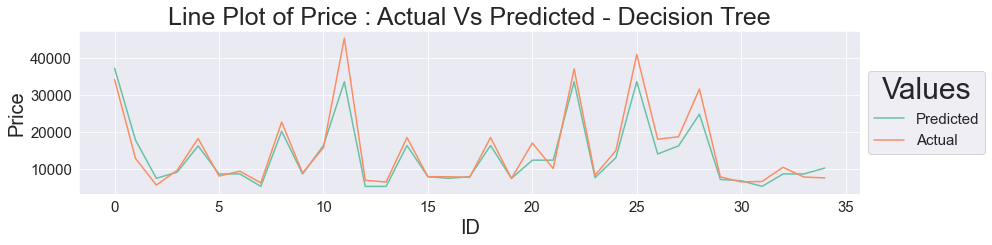

In [169]:
plot_lineplot(y_test,y_pred_test,'Decision Tree')

## Random Forest Model

In [170]:
from sklearn.ensemble import RandomForestRegressor

parameter_space = \
    {
        "n_estimators": np.arange(10,1000,10),
        "criterion": ['mse','mae'],
        "max_depth": np.arange(2,300,2),
        "min_samples_split": np.arange(2,10,2),
        "min_samples_leaf": np.arange(1,10,1),
        "max_features": [10, 100, X_train.shape[1]],
        "bootstrap": [True, False],
    }

clf = RandomizedSearchCV(RandomForestRegressor(random_state=3), 
                         parameter_space, cv=3, n_jobs=-1,
                         scoring="neg_root_mean_squared_error", 
                         n_iter=10, random_state=3)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'n_estimators': 530, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 15, 'max_depth': 14, 'criterion': 'mse', 'bootstrap': True}


In [171]:
rf_model = RandomForestRegressor(**clf.best_params_)

In [172]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', max_depth=14, max_features=15,
                      min_samples_split=6, n_estimators=530)

In [173]:
y_pred_train = rf_model.predict(X_train) 
y_pred_test = rf_model.predict(X_test) 

In [174]:
print_metrics('Random Forest',y_train,y_test,y_pred_train,y_pred_test)

MAE for training set is 0.06757382247825468
MAE for test set is 0.10179232972870511

MSE for training set is 0.0076114140388129845
MSE for test set is 0.016655716214044557

RMSE for training set is 0.08724341831228866
RMSE for test set is 0.12905702698437058

R2 score for training set is 0.9680314696636636
R2 score for test set is 0.9541837063315248

Adjusted R2 score for training set is 0.9641009126550977
Adjusted R2 score for test set is 0.9180129481722024


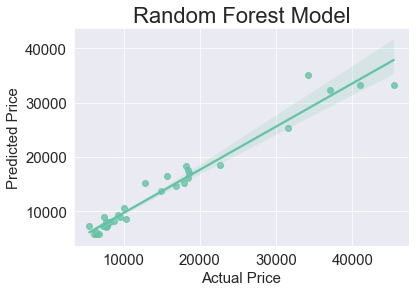

In [175]:
sns.regplot(x=np.exp(y_test),y=np.exp(y_pred_test))
plt.title('Random Forest Model',fontdict={'fontsize':22})
plt.xlabel('Actual Price',fontdict={'fontsize':15})
plt.ylabel('Predicted Price',fontdict={'fontsize':15})
plt.savefig('Random Forest Model.png',dpi=300,bbox_inches='tight')
plt.show()

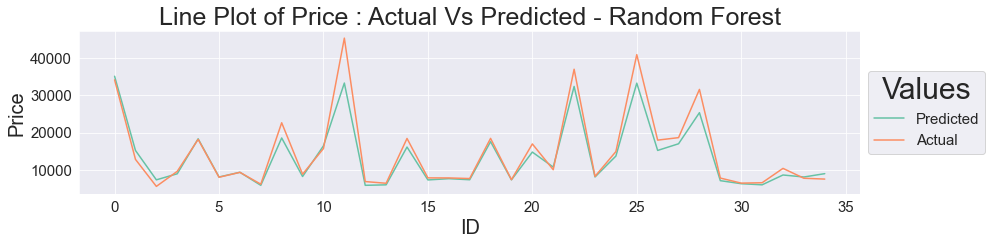

In [176]:
plot_lineplot(y_test,y_pred_test,'Random Forest')

In [116]:
model_frame = {'Model':model_name,'MAE':mae,'MSE': mse,'RMSE':rmse, 'R2':r2,'Adj R2': adj_r2 }
score_metrics = pd.DataFrame(model_frame)

In [117]:
score_metrics

Model       MAE       MSE      RMSE        R2    Adj R2
0  Linear Regresion  0.177373  0.052158  0.228382  0.856524  0.743253
1  Ridge Regression  0.181629  0.054086  0.232564  0.851221  0.733765
2       Elastic Net  0.317833  0.155710  0.394601  0.571675  0.233523
3     Decision Tree  0.144834  0.030111  0.173527  0.917170  0.851778
4     Random Forest  0.102253  0.016689  0.129184  0.954094  0.917852

# Data pipeline

In [118]:
def perform_log_transform(df,cols):
    '''
    '''
    for col in cols:
        df[col+'_log'] = np.log(df[col])
        df.drop(col,axis=1,inplace=True)

def scale_data(data=None):
    sc = StandardScaler()
    sc_data=sc.fit_transform(data)
    return pd.DataFrame(data=sc_data,columns=data.columns)

def classrange(x):
    if x in Low:
        return "Low"
    elif x in Mid:
        return 'Mid'
    elif x in High:
        return "High"
    else: 
        return x
    
def dataset_pipeline(df):
    for i in df.columns[1:].tolist():
        for j in df[df[i]=='?'][i].index.tolist():
            df[i].iloc[j]=np.nan
    df.drop(['wheel-base','curb-weight','highway-mpg','engine-location','engine-size'],axis=1,inplace=True)
    df.reset_index(drop=True,inplace=True)
    df['horsepower'] = df.horsepower.astype('int64')
    df['peak-rpm'] = df['peak-rpm'].astype('int64')
    df['bore'] = df.bore.astype('float')
    df['stroke'] = df.stroke.astype('float')
    Low = ['chevrolet', 'dodge', 'honda', 'isuzu', 'mitsubishi', 'plymouth', 'subaru', 'volkswagen']
    Mid = ['alfa-romero', 'audi', 'mazda', 'mercury', 'nissan', 'peugot', 'saab', 'toyota', 'volvo']
    High = ['bmw', 'jaguar', 'mercedes-benz', 'porsche']
    df['price_range'] = df['make'].apply(lambda x: classrange(x))
    engine_type_dict = {'ohc':1,'ohcf':0,'ohcv':0,'dohc':0,'l':0}
    num_of_cylinders_dict = {'four':1,'six':2,'five':0,'eight':0,'three':0,'twelve':0}
    fuel_system_dict = {'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':3,'mfi':3,'spfi':3}
    drive_wheels_dict = {'fwd': 0, 'rwd': 1, '4wd': 2}
    aspiration_dict = {'std': 0, 'turbo': 1}
    fuel_type_dict = {'gas': 0, 'diesel': 1}
    num_of_doors_dict = {'four': 0, 'two': 1}
    body_style_dict = {'sedan': 0, 'hatchback': 1, 'wagon': 2, 'hardtop': 3, 'convertible': 3}
    price_range_dict = {'High':0,'Mid':1,'Low':2}
    df = df.replace(drive_wheels_dict)
    df = df.replace(aspiration_dict)
    df = df.replace(fuel_type_dict)
    df = df.replace(num_of_doors_dict)
    df = df.replace(body_style_dict)
    df = df.replace(engine_type_dict)
    df = df.replace(num_of_cylinders_dict)
    df = df.replace(fuel_system_dict)
    df = df.replace(price_range_dict)
    perform_log_transform(df,['horsepower','width'])
    x_dash = scale_data(df[['length','height','bore','stroke','peak-rpm','city-mpg','compression-ratio']])
    df.drop('make',axis=1,inplace=True)
    for i in x_dash.columns.tolist():
        df[i] = x_dash[i]
    cols = ['symboling', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'length', 'height', 'engine-type',
             'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'peak-rpm', 'city-mpg', 'price_range']
    X = df[cols].values
    print('data shape',df[cols].shape)
    print('data info()',df[cols].info(verbose=True,memory_usage='deep',null_counts=True))
    return X

In [119]:
data = pd.read_csv('TestData.csv')

In [120]:
data

ID  symboling normalized-losses        make fuel-type aspiration  \
0    1         -2               103       volvo       gas        std   
1    2          0               188         bmw       gas        std   
2    3         -1                74       volvo       gas      turbo   
3    4          1               154    plymouth       gas        std   
4    5          1               103      nissan       gas        std   
5    6          2                94  volkswagen    diesel      turbo   
6    7          0               118       mazda       gas        std   
7    8          0               161      peugot       gas        std   
8    9          1               101       honda       gas        std   
9   10          2               161  mitsubishi       gas        std   
10  11          3               150        saab       gas        std   
11  12          1               128      nissan       gas        std   
12  13          1               168      toyota       gas        std   
13  14          1                87      toyota       gas        std   
14  15          2                 ?        audi       gas        std   
15  16          0                 ?         bmw       gas        std   
16  17          1               168      toyota       gas        std   
17  18          0                 ?      peugot       gas        std   
18  19          2               192         bmw       gas        std   
19  20          0                91      toyota    diesel        std   

   num-of-doors body-style drive-wheels engine-location  wheel-base  length  \
0          four      sedan          rwd           front       104.3   188.8   
1          four      sedan          rwd           front       101.2   176.8   
2          four      wagon          rwd           front       104.3   188.8   
3          four      sedan          fwd           front        93.7   167.3   
4          four      wagon          fwd           front        94.5   170.2   
5          four      sedan          fwd           front        97.3   171.7   
6          four      sedan          rwd           front       104.9   175.0   
7          four      sedan          rwd           front       107.9   186.7   
8           two  hatchback          fwd           front        93.7   150.0   
9           two  hatchback          fwd           front        93.7   157.3   
10          two  hatchback          fwd           front        99.1   186.6   
11          two      sedan          fwd           front        94.5   165.3   
12          two  hatchback          rwd           front        94.5   168.7   
13          two  hatchback          fwd           front        95.7   158.7   
14          two      sedan          fwd           front        99.8   177.3   
15         four      sedan          rwd           front       103.5   189.0   
16          two  hatchback          rwd           front        94.5   168.7   
17         four      wagon          rwd           front       114.2   198.9   
18          two      sedan          rwd           front       101.2   176.8   
19         four      sedan          fwd           front        95.7   166.3   

    width  height  curb-weight engine-type num-of-cylinders  engine-size  \
0    67.2    56.2         2912         ohc             four          141   
1    64.8    54.3         2765         ohc              six          164   
2    67.2    57.5         3157         ohc             four          130   
3    63.8    50.8         1989         ohc             four           90   
4    63.8    53.5         2037         ohc             four           97   
5    65.5    55.7         2319         ohc             four           97   
6    66.1    54.4         2670         ohc             four          140   
7    68.4    56.7         3020           l             four          120   
8    64.0    52.6         1956         ohc             four           92   
9    64.4    50.8         1944         ohc             four           9

In [121]:
X_check = dataset_pipeline(data)

data shape (20, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         20 non-null     int64  
 1   aspiration        20 non-null     int64  
 2   num-of-doors      20 non-null     int64  
 3   body-style        20 non-null     int64  
 4   drive-wheels      20 non-null     int64  
 5   length            20 non-null     float64
 6   height            20 non-null     float64
 7   engine-type       20 non-null     int64  
 8   num-of-cylinders  20 non-null     int64  
 9   fuel-system       20 non-null     int64  
 10  bore              20 non-null     float64
 11  stroke            20 non-null     float64
 12  peak-rpm          20 non-null     float64
 13  city-mpg          20 non-null     float64
 14  price_range       20 non-null     int64  
dtypes: float64(6), int64(9)
memory usage: 2.5 KB
data info() None


In [122]:
X_check

array([[-2.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.17768633,  1.02958312,  1.        ,  0.        ,  0.        ,
         1.70886053,  0.13602321,  0.34835971, -0.40291922,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.19320455,  0.01072482,  1.        ,  2.        ,  0.        ,
         0.17170369,  0.2482073 , -1.81711959, -0.71285709,  0.        ],
       [-1.        ,  1.        ,  0.        ,  2.        ,  1.        ,
         1.17768633,  1.7266967 ,  1.        ,  0.        ,  0.        ,
         1.18557309,  0.13602321, -0.21654793, -1.33273281,  1.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.58617686, -1.86611941,  1.        ,  0.        ,  1.        ,
        -0.94028211,  0.36039139,  0.53666226,  0.83683223,  2.        ],
       [ 1.        ,  0.        ,  0.        ,  2.        ,  0.        ,
        -0.34826043, -0.41826814,  1.        , 

In [123]:
y_result = np.exp(rf_model.predict(X_check))

In [124]:
result = pd.DataFrame(y_result,columns=['result'])

In [125]:
result['result']

0     15656.369827
1     24596.517122
2     16448.253139
3      7319.876951
4      7395.060186
5      7822.434472
6     15780.747215
7     15658.209857
8      6512.690252
9      6442.125579
10    14241.669104
11     7224.935615
12     7801.820790
13     5820.846446
14    15545.063589
15    34789.809077
16     9016.696785
17    15180.667235
18    15010.552009
19     7308.851775
Name: result, dtype: float64

In [126]:
result['result'].to_csv("submission.csv",header=False)

# Thank You